## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 nbconvert -q 

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

# Importing the needed libraries

In [2]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to build a linear regression model
from sklearn.linear_model import LinearRegression

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the dataset

In [3]:
# loading data into a pandas dataframe
loans_original = pd.read_csv("Loan_Modelling.csv")

#Making a copy of the dataframe so the original data frame is not modified.
loans = loans_original.copy()

# Data Overview

* Observations
* Sanity checks

## Check the first 5 rows

In [4]:
loans.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Check the last 5 rows

In [5]:
loans.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## Check the shape of the data frame

In [6]:
loans.shape

(5000, 14)

## Check the attributes of the dataset

In [7]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Checking the statistical summary

In [8]:
loans.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Observations on the statistical summary:
* Age: The minimum age in the dataset is 23 years old and the maximum is 67 years old. 25% of the customers are 35 years old and 75% of the customers are 55 years old. The average age is 45 years old.
* Experience: There are negative values in the dataset, with the minimum being -3 (which is not possible) , maximum years of experience is 43 years, 25% of the dataset has 10 years of experience and 75% of the dataset has 30 years of experience. The average years of experience is 20.
* Income: the minimum income is 8000 dollars and the maximum income is 224.000 dollars. 25 % of the customer's has an income of 39.000 dollars and 75% of the customers has an income of 98.000 dollars. The average income is 64.000 dollars.
* ZipCode: The minimum zip code is 90005, the maximum is 96651.
* Family: The family size has a minimum of 1 and a maximum of 4. The average for family is 2.
* CCAvg: The average spending on a credit card has a minimum of 0, a maximum of 10000 and an average  of 1500.
* Education: The average for education level correspons to 2: Graduate.
* Mortgage: We have zeros in the minimum, 25%, and average. It seems that most of the customers don't have a mortgage.
* Personal_Loan: We have zeros in the minimum, 25%, average and 75% which indicate very few customers accepted the loan offered in the last campaign.  
* Securities_Account: We have zeros in the minimum, 25%, average and 75% which indicate very few customers have securities with the bank.
* CD_Account: We have zeros in the minimum, 25%, average and 75% which indicate very few customers have certificate of deposit with the bank.
* Online: The average is 1 which means at least 50% of the customers use the internet banking facilities.
* CreditCard: We have zeros in the minimum, 25% and average which indicates very few customers are using a credit card issued by any other bank.



## Checking for missing values

In [9]:
loans.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

## Checking for duplicates values

In [10]:
loans.duplicated().sum()

0

## Check unique values for each column

In [11]:
#Check unique values for each column
for columns in loans.columns:
  print(columns, loans[columns].unique())

ID [   1    2    3 ... 4998 4999 5000]
Age [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]

## Check that the IDs are not duplicated

In [12]:
#Check that the column ID does not have duplicated values
loans['ID'].duplicated().sum()

0

## Observations on the Data Overview
* The data has 5000 rows and 14 columns.
* All of the fields are int64 but CCAvg which is float64.
* No duplicates or null values in the data.
* All the columns (Personal_Loan,Securities_Account,CD_Account,Online,CreditCard) that need to have 0 or 1 have only those values.
* Family has 4 unique values.
* There are 5000 unique customers in the dataset according to the column ID.
* ZipCode seems to have too many values which could be a problem for the analysis. We will check them in Data Preprocesing.

# Data Preprocessing

## ZIPCode field

* Let's check how many unique ZIPCodes we have.

In [13]:
loans["ZIPCode"].nunique()

467

* There are 467 unique ZIPCode. This amount of unique values will need to be reviewed later.

## Experience field

In [14]:
#Check what are the negative values in experience given the statistic description has negatives
negative_experience_values = loans[loans['Experience'] < 0]['Experience'].unique()  
print(negative_experience_values)

[-1 -2 -3]


As we can see the following values are negatives: -1,-2 and -3. I will convert all values to absolutes.

In [15]:
# Convert all the values in Experience column to absolutes and see again the unique values:
loans['Experience']=loans['Experience'].apply(abs)

In [16]:
loans['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

## Check negative values in the other fields

In [17]:
# Check negative values in Age
loans[loans['Age']<=0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [18]:
#Check negative values in Income
loans[loans['Income']<=0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [19]:
#Check negative values in Family
loans[loans['Family']<0.0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [20]:
#Check negative values in CCAvg
loans[loans['CCAvg']<0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [21]:
#Check negative values in Education
loans[loans['Education']<0.0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [22]:
#Check negative values in Mortgage
loans[loans['Mortgage']<0.0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


* All the values are now positive or 0. 
* Also there are no negative values in the other columns.

# Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

## Define the functions for the plots

In [23]:
def histplotfunction(source,x,title,xlabel,ylabel,rotation,fontsize,bins,hue=None):

    # Parameters
    # Source: the dataframe
    # x: the column for the X axes.
    # title: the title of the graphic.
    # xlabel: the label for the X axes.
    # ylabel: the label for the Y axes.
    # rotation: the rotation of the text for the X axes.
    # fontsize: the fontsize for the graph.
    # hue: by default it's None. 
    
    plt.figure(figsize=(15, 7))
    if bins!=1:
        sns.histplot(data=source,x=x,hue=hue,bins=bins, multiple='dodge')
    else:
          sns.histplot(data=source,x=x,hue=hue, multiple='dodge')


#Customize the plot

    plt.title(title)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.xticks(rotation=rotation,fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    plt.show()

In [24]:
def boxplotfunction(source,x,y,title,xlabel,ylabel,rotation,fontsize,hue=None):

    # Parameters
    # Source: the dataframe
    # x: the column for the X axes.
    # y: the column for the Y axes.
    # title: the title of the graphic.
    # xlabel: the label for the X axes.
    # ylabel: the label for the Y axes.
    # rotation: the rotation of the text for the X axes.
    # fontsize: the fontsize for the graph.
    # hue: by default it's None. 
    
    plt.figure(figsize=(15, 7))
    if y!='None':
        sns.boxplot(data=source,x=x,y=y,hue=hue)
    else:
        sns.boxplot(data=source,x=x,hue=hue)

#Customize the plot

    plt.title(title)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.xticks(rotation=rotation,fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    plt.show()

In [25]:
def barplotfunction(source,x,y,title,xlabel,ylabel,rotation,fontsize,hue=None):

    # Parameters
    # Source: the dataframe
    # x: the column for the X axes.
    # y: the columns for the y axes.
    # title: the title of the graphic.
    # xlabel: the label for the X axes.
    # ylabel: the label for the Y axes.
    # rotation: the rotation of the text for the X axes.
    # fontsize: the fontsize for the graph.
    # hue: by default it's None. 
    
    plt.figure(figsize=(15, 7))
    if y!='None':
        sns.barplot(data=source,x=x,y=y,hue=hue)
    else:
        sns.barplot(data=source,x=x,hue=hue)

#Customize the plot

    plt.title(title)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.xticks(rotation=rotation,fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    plt.show()

In [26]:
def scatterplotfunction(source,x,y,title,xlabel,ylabel,rotation,fontsize,hue=None):

    # Parameters
    # Source: the dataframe
    # x: the column for the X axes.
    # y: the columns for the y axes.
    # title: the title of the graphic.
    # xlabel: the label for the X axes.
    # ylabel: the label for the Y axes.
    # rotation: the rotation of the text for the X axes.
    # fontsize: the fontsize for the graph.
    # hue: by default it's None. 
    
    plt.figure(figsize=(15, 7))
    if y!='None':
        sns.scatterplot(data=source,x=x,y=y,hue=hue)
    else:
        sns.scatterplot(data=source,x=x,hue=hue)

#Customize the plot

    plt.title(title)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.xticks(rotation=rotation,fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    plt.show()

In [27]:
def showoutliers(column):
    # Find the Q1,Q3,IQR and Lower and upper whiskers of the boxplot below
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

    lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values.
    upper_whisker = Q3 + 1.5*IQR

    #Print all the values to include in the analysis.
    print("Lower Whisker: ",lower_whisker)
    print("Upper Whisker: ",upper_whisker)
    print("IQR: ",IQR)
    print("Q1: ",Q1)
    print("Q3: ",Q3)

## Questions

### 1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

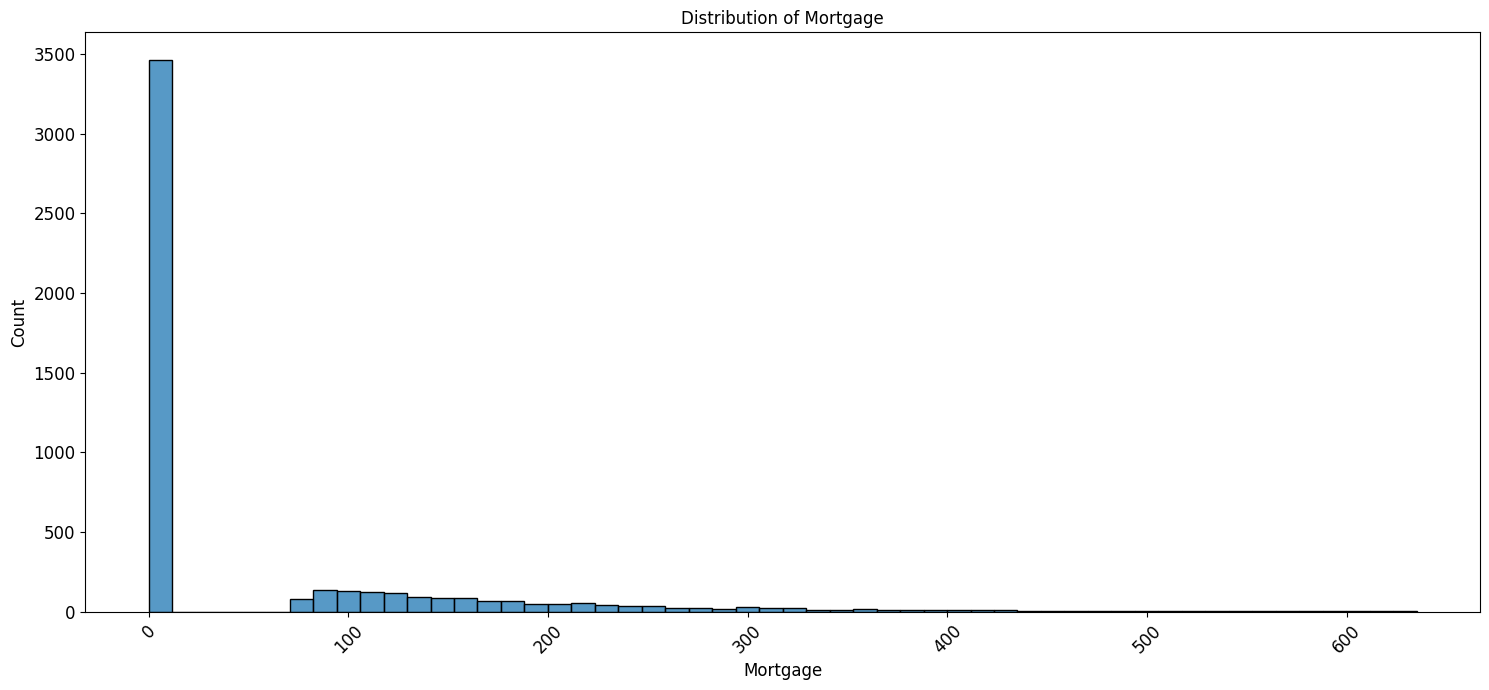

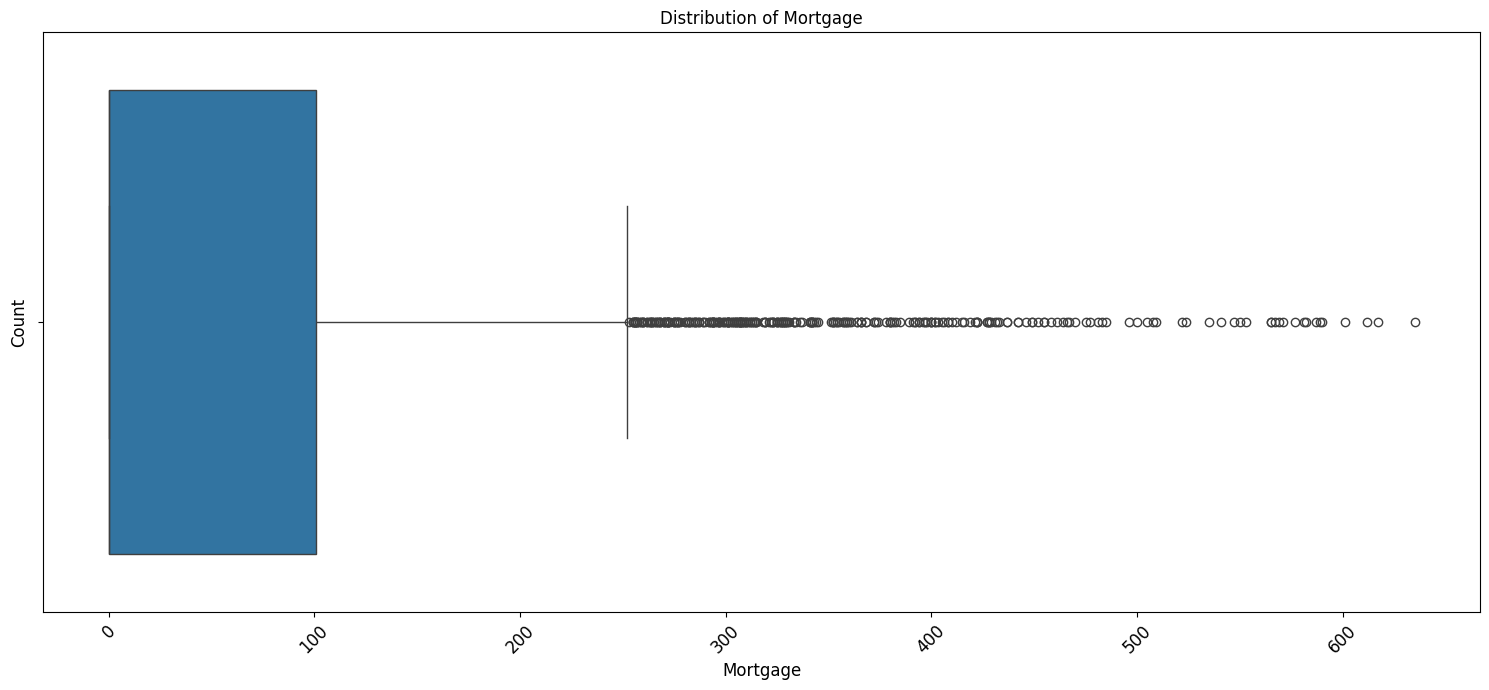

Lower Whisker:  -151.5
Upper Whisker:  252.5
IQR:  101.0
Q1:  0.0
Q3:  101.0


In [28]:
#Get the histplot and boxplot for Mortgage and calculate outliers. 
histplotfunction(loans,"Mortgage",'Distribution of Mortgage','Mortgage','Count',45,12,1)
boxplotfunction(loans,"Mortgage",None,'Distribution of Mortgage','Mortgage','Count',45,12)
showoutliers(loans["Mortgage"])

#### Observations on Mortgage

* The distribution is very right skewed. It seems to be a lot of mortages with 0 value in the dataset. 
* The Q1 is 0 and the Q3 is 101 which means many records are between those values and there are many outliers after the upper whisker. Now I will check how many customers don't have mortgages in total for the dataset.

In [29]:
# Check the percentages of customers who don't have a mortgage
print(loans[loans['Mortgage'] == 0].shape[0]/loans.shape[0])

0.6924


* Almost 70% of the customers don't have a mortgage.

### 2. How many customers have credit cards ? 

In [30]:
print(loans[loans['CreditCard'] == 1].shape[0])

1470


* 1470 customers have credit cards with other banks.

### 3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

<Axes: >

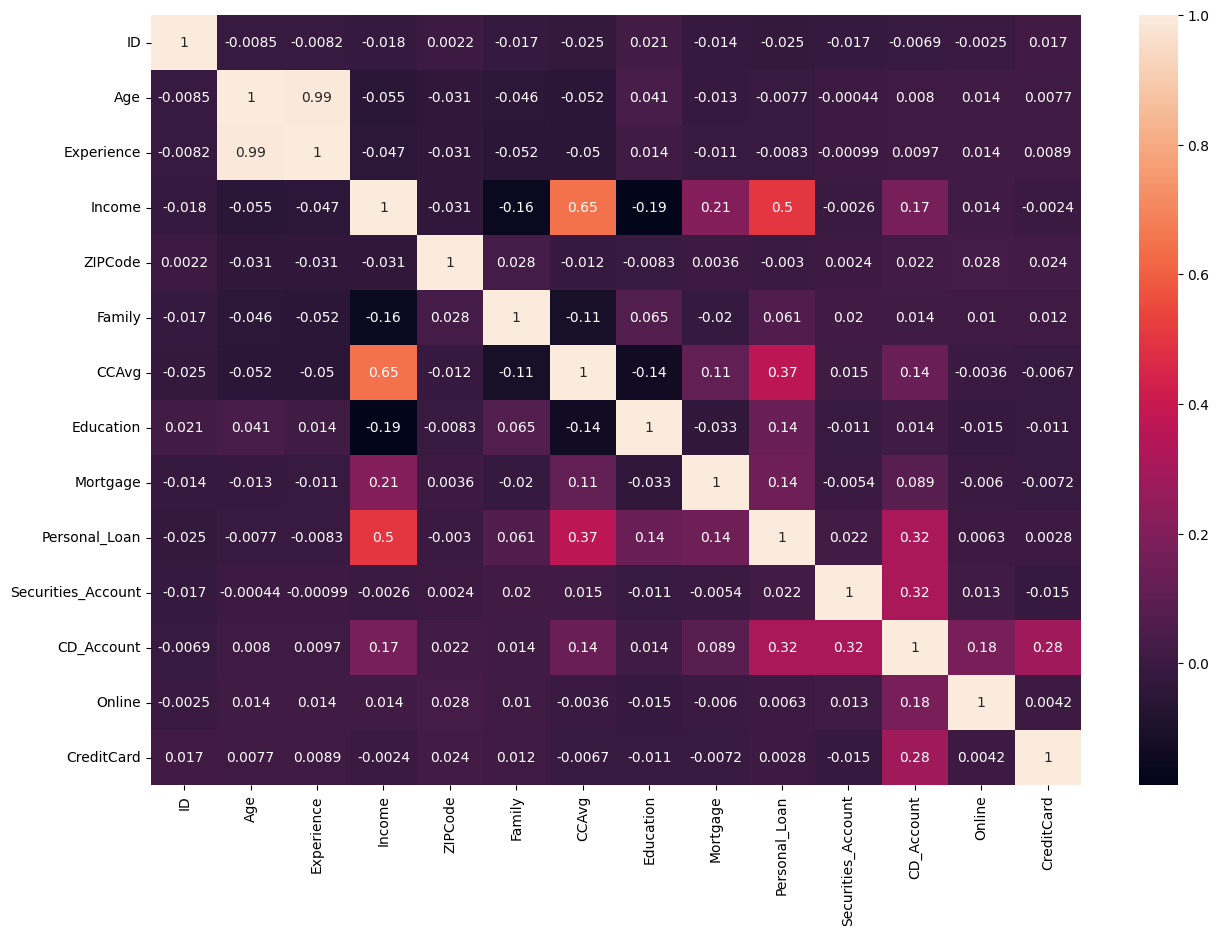

In [31]:
# Create the heatmap to see the correlation with all fields. 
plt.figure(figsize=(15,10))
sns.heatmap(loans.corr(), annot=True)

#### Observations on correlation
* Income and Average spending on credit cards per month (in thousand dollars) has the stronger correlations with the Personal_Loan
* Also there is a very high correlation between Age and Experience which makes sense given as people age they get more experience.
* There is also an strong correlation between Income and Average spending on credit cards per month (in thousand dollars)

### 4. How does a customer's interest in purchasing a loan vary with their age? 

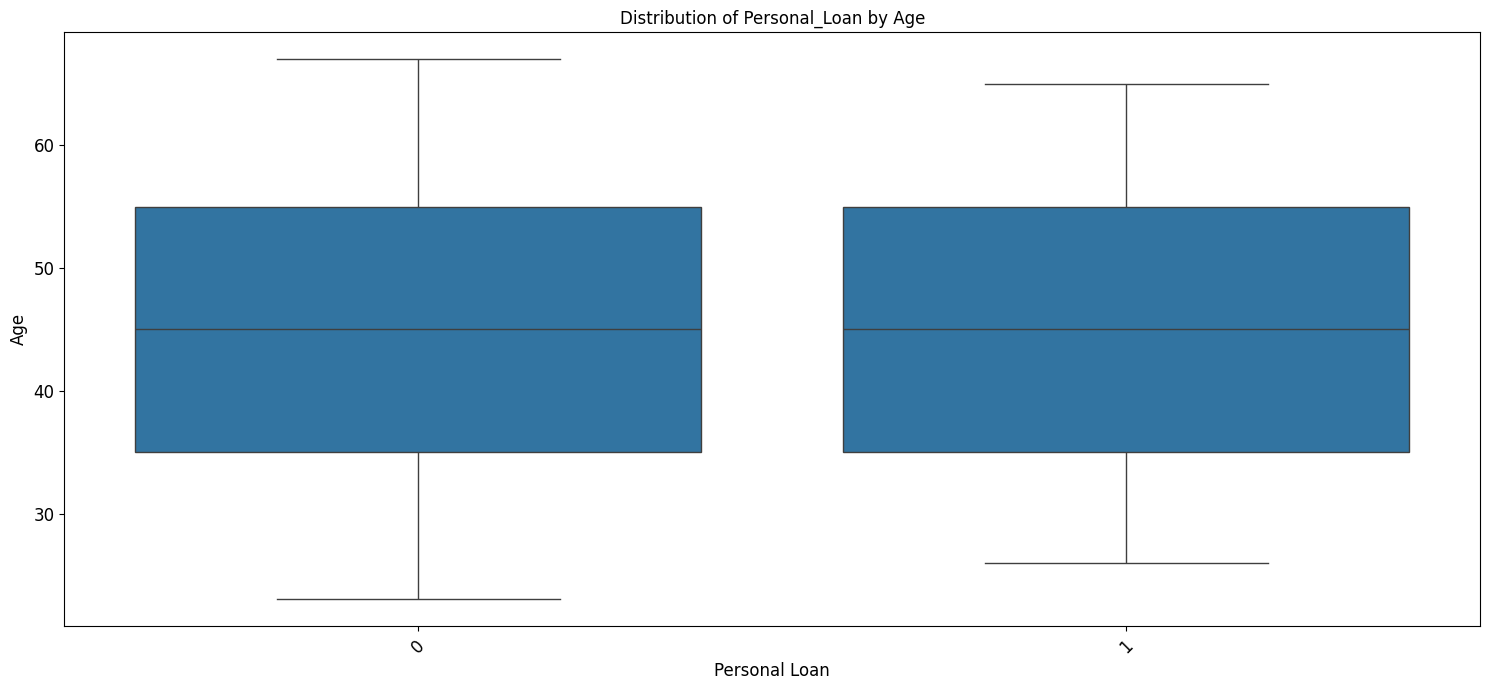

In [32]:
#Boxplot by Age for Personal_Loan field
boxplotfunction(loans,"Personal_Loan","Age",'Distribution of Personal_Loan by Age','Personal Loan','Age',45,12)

* The boxplot does not show much differences with Personal_Loan and age, I will try now the histplot

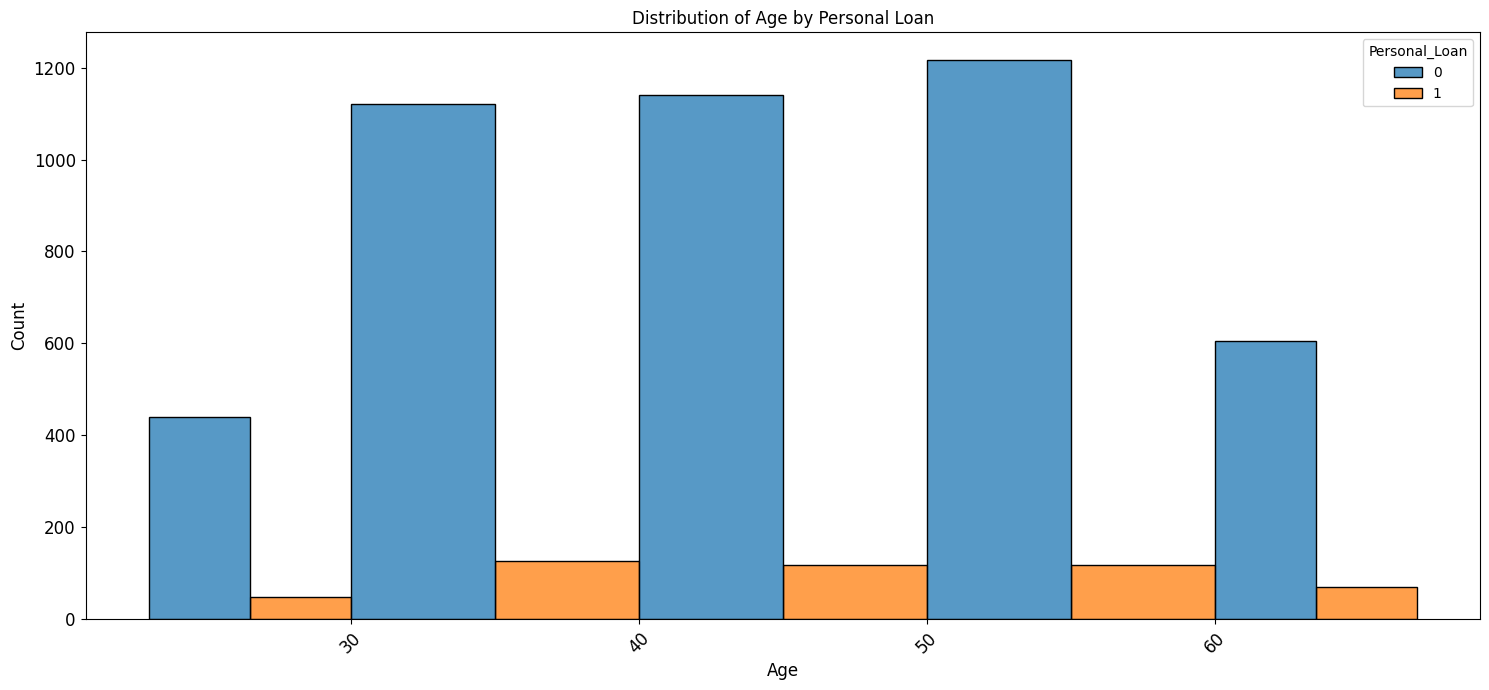

In [33]:
histplotfunction(loans,"Age",'Distribution of Age by Personal Loan','Age','Count',45,12,[23, 30, 40, 50, 60, 67],"Personal_Loan")

* The interest in a loan in the dataset is very low not matter the age, being the lowest before 30 years old and after 60 years old.

### 5. How does a customer's interest in purchasing a loan vary with their education? 

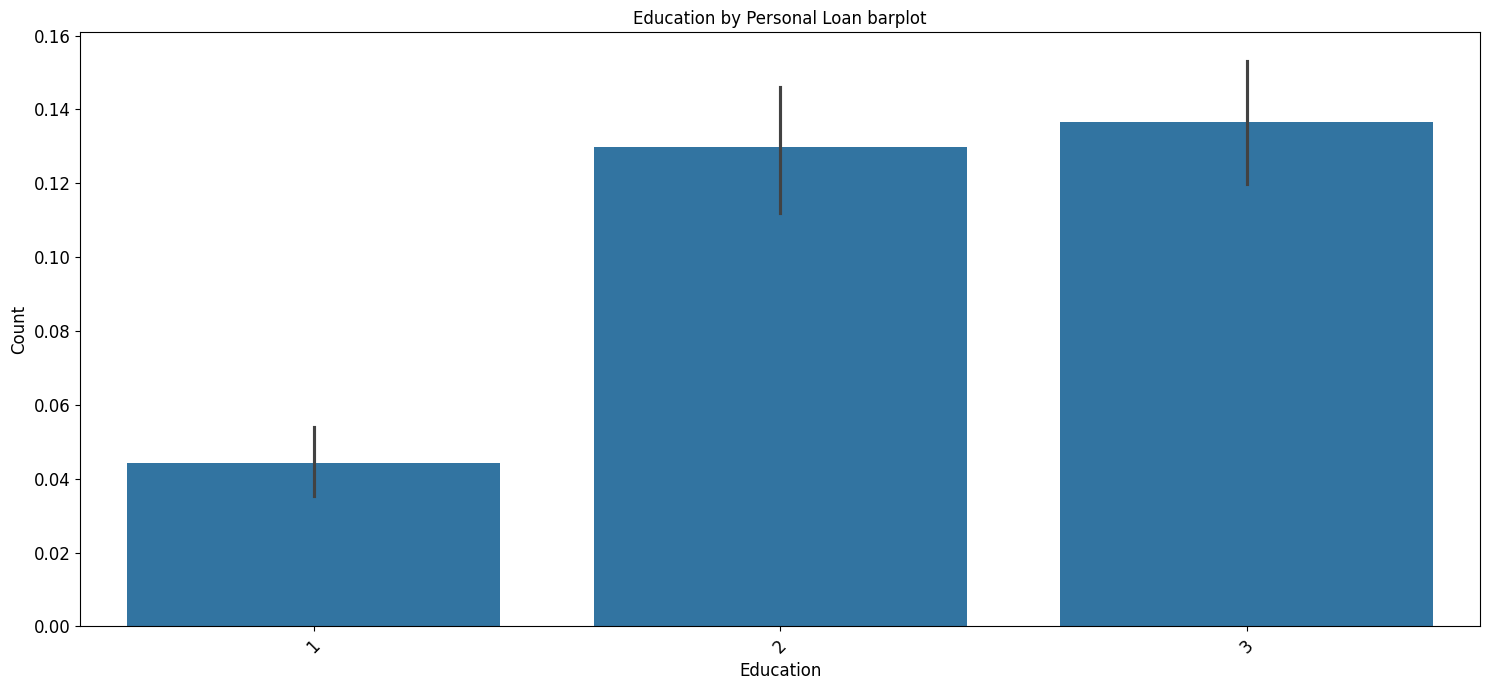

In [34]:
#Box Plot for Education vs Personal_Loan
barplotfunction(loans,"Education","Personal_Loan","Education by Personal Loan barplot","Education","Count",45,12)


* For a education level 2 and 3 which are Graduated and Advanced/Professional, the interest on purchasing a loan goes up drastically. There is virtually not interest on purchasing a loan for people that have a level 1 education, which means they are Undergrad. 

## Additional questions

### Distribution of each variable to see if we have outliers that were not taken care of in the initial analysis

#### Distribution of Age: There are not outliers for age.

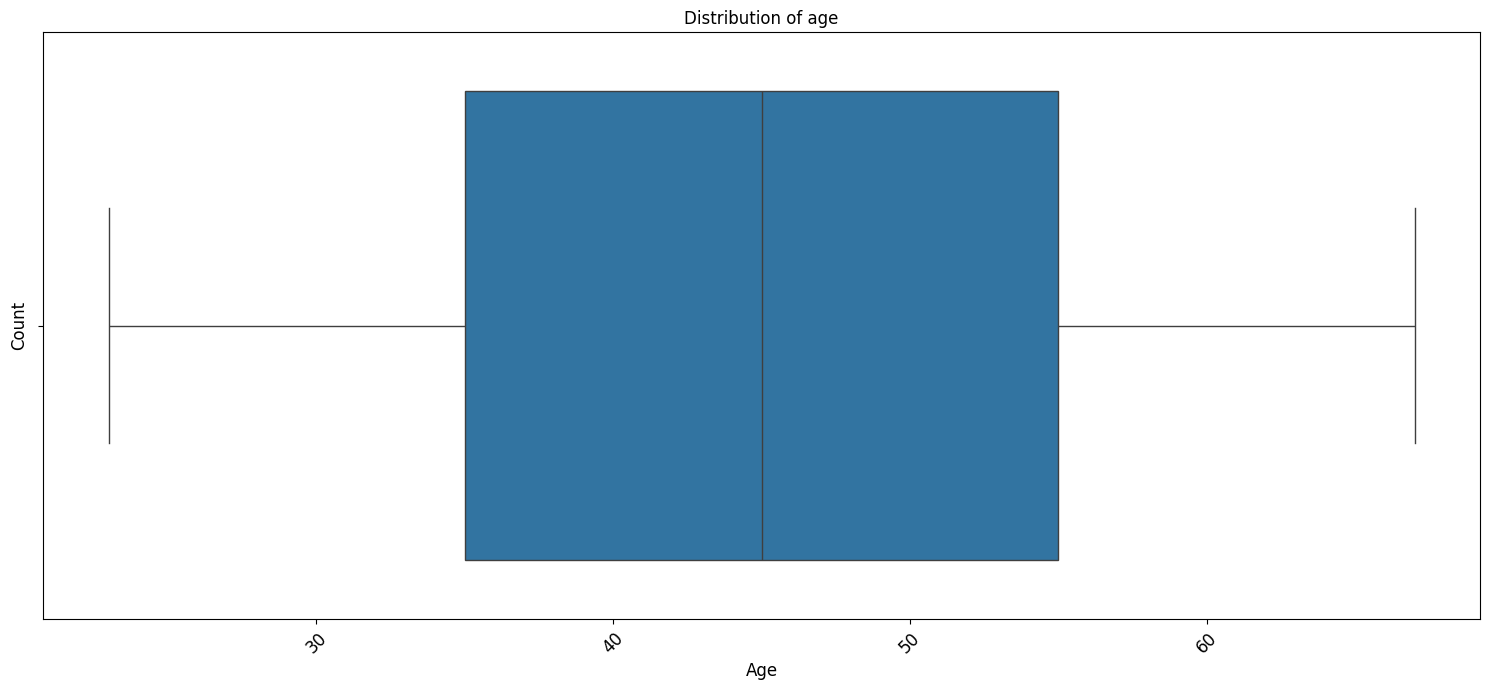

In [35]:
boxplotfunction(loans,"Age",None,"Distribution of age","Age","Count",45,12)

#### Distribution for Experience: There are not outliers for Experience given the negative values were taken care of.

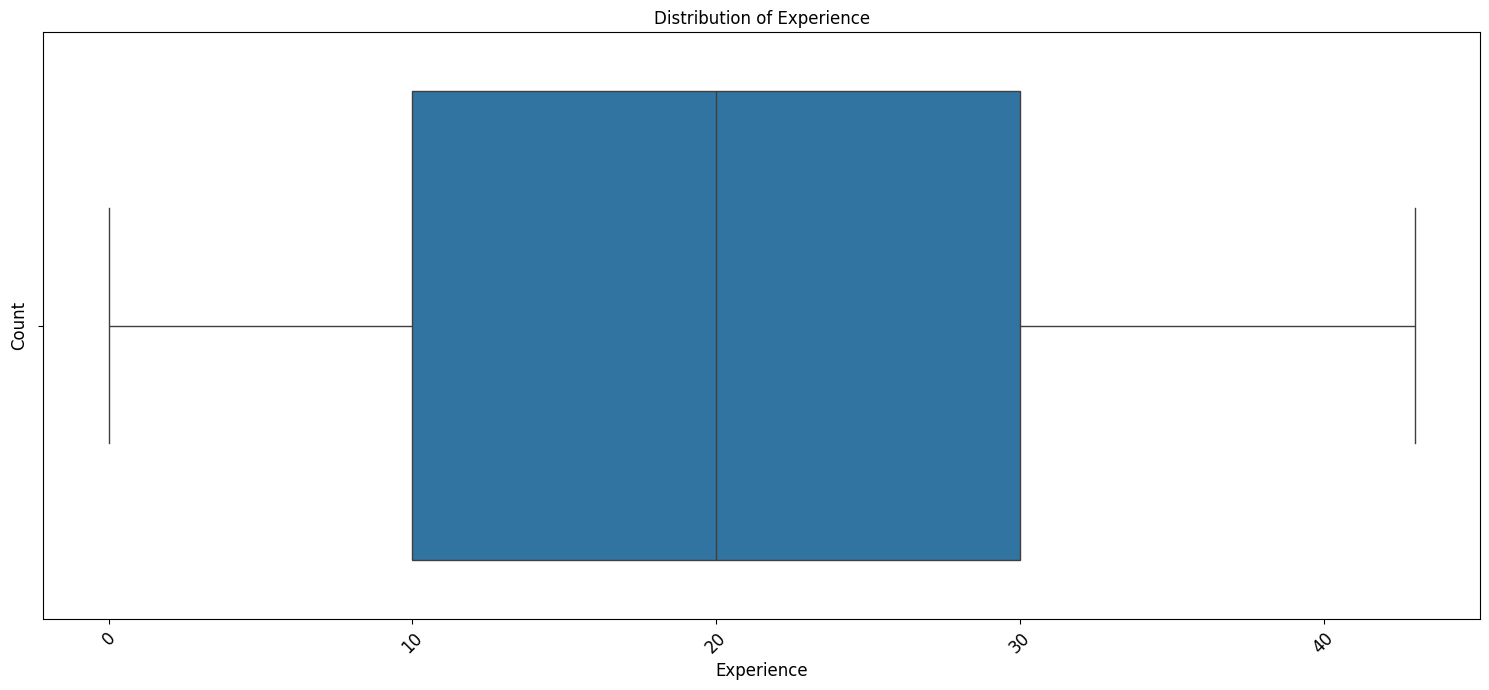

In [36]:
boxplotfunction(loans,"Experience",None,"Distribution of Experience","Experience","Count",45,12)

#### Distribution for Income: There are some outliers in the dataset for Income. We will work on them(if needed) in the Data Preprocesing section.

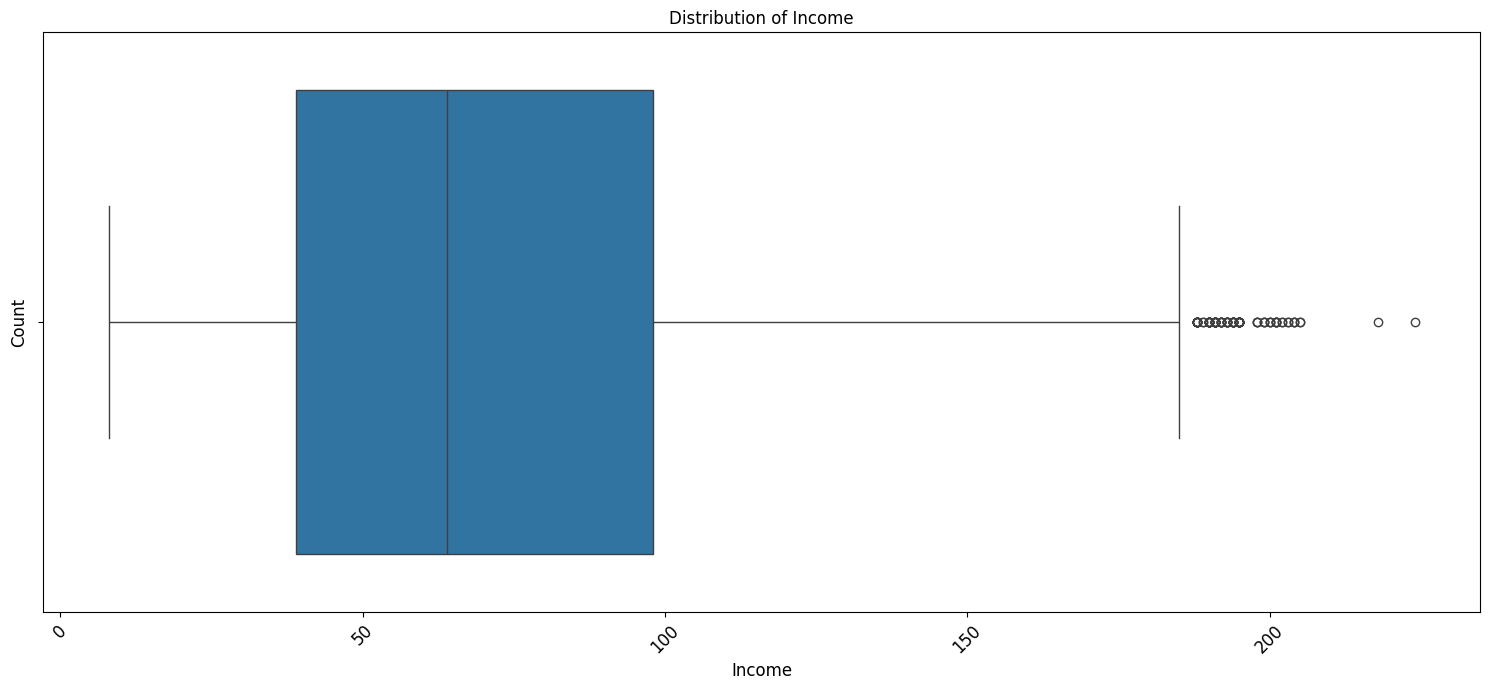

In [37]:
boxplotfunction(loans,"Income",None,"Distribution of Income","Income","Count",45,12)

#### Distribution for ZIPCode: There are not outliers for ZIPCode

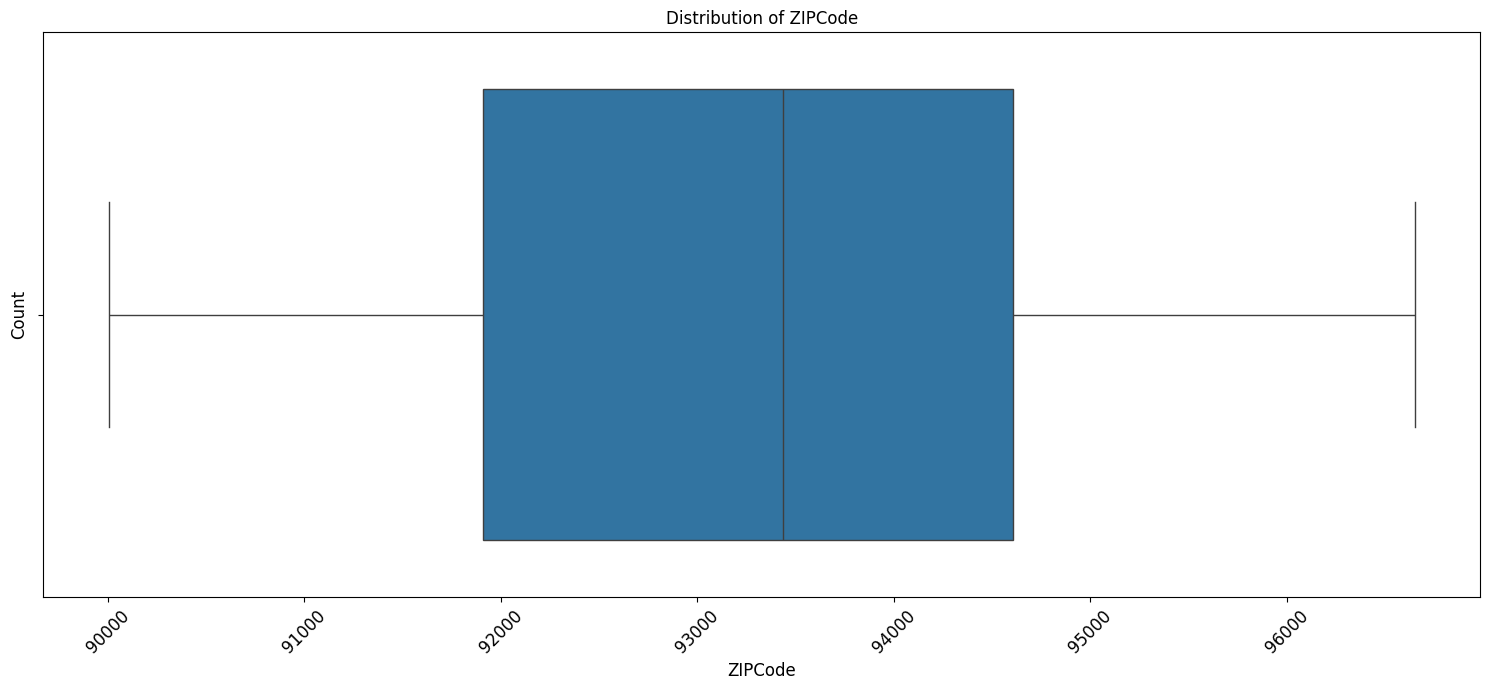

In [38]:
boxplotfunction(loans,"ZIPCode",None,"Distribution of ZIPCode","ZIPCode","Count",45,12)

#### Distribution for Family Size: There are not outliers for Family Size

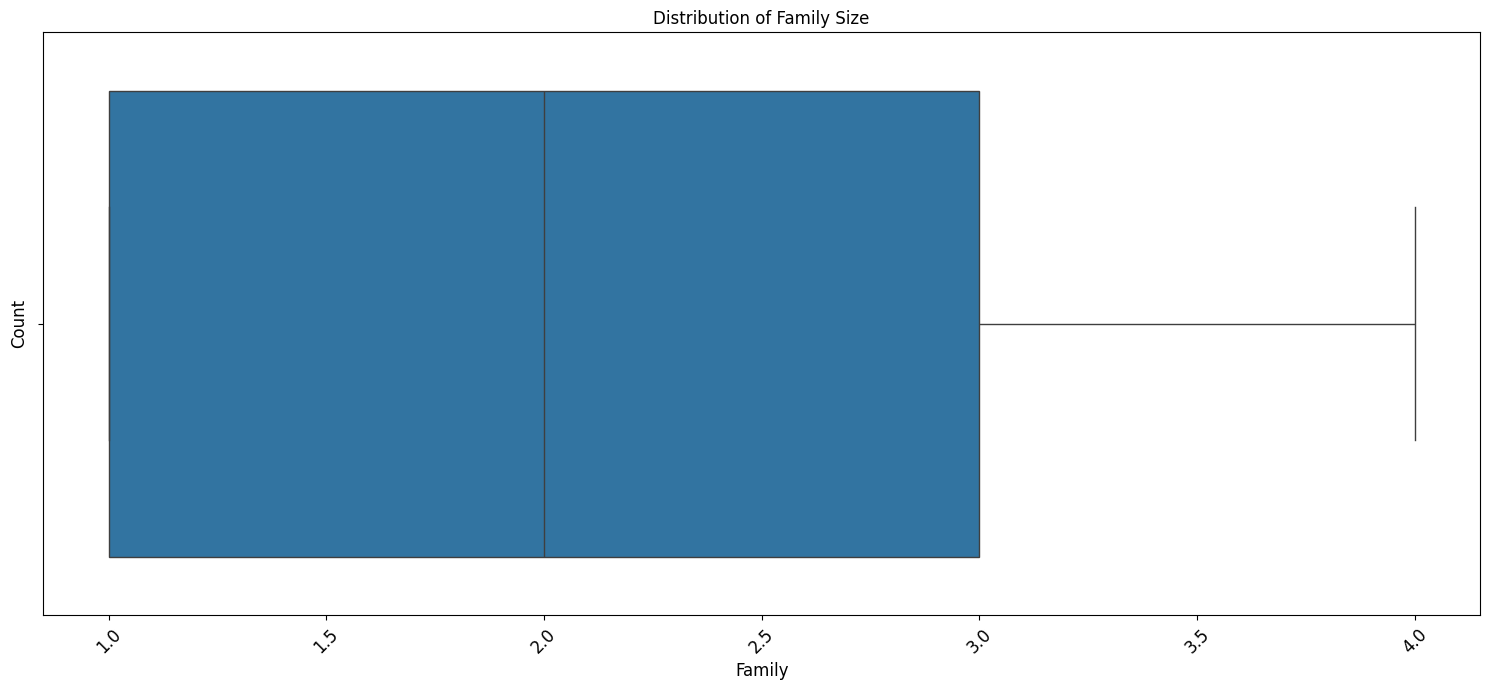

In [39]:
boxplotfunction(loans,"Family",None,"Distribution of Family Size","Family","Count",45,12)

#### Distribution for Credit Card Average Spending: There are many outliers for Credit Card Average Spending. We will work on them (if needed) in the Data Preprocesing section

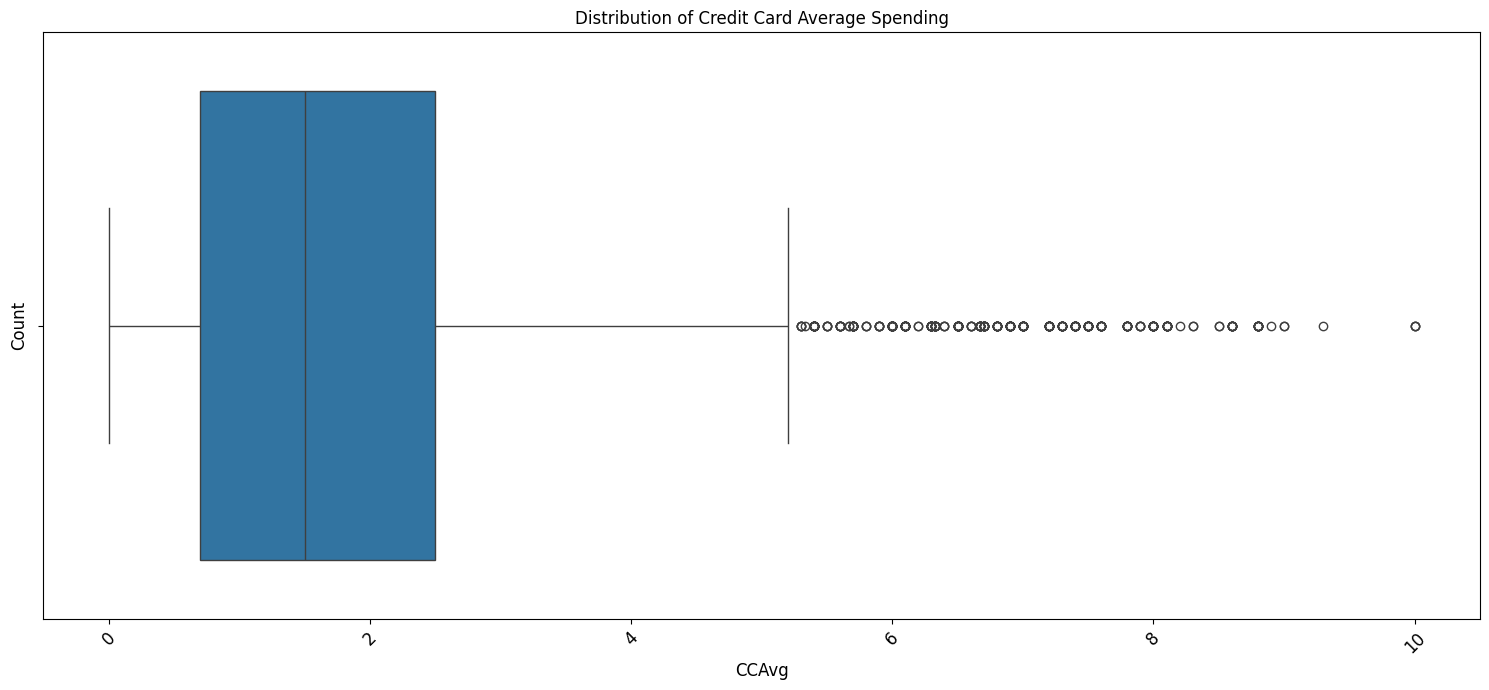

In [40]:
boxplotfunction(loans,"CCAvg",None,"Distribution of Credit Card Average Spending","CCAvg","Count",45,12)

#### Distribution of Education: There are no outliers in education.

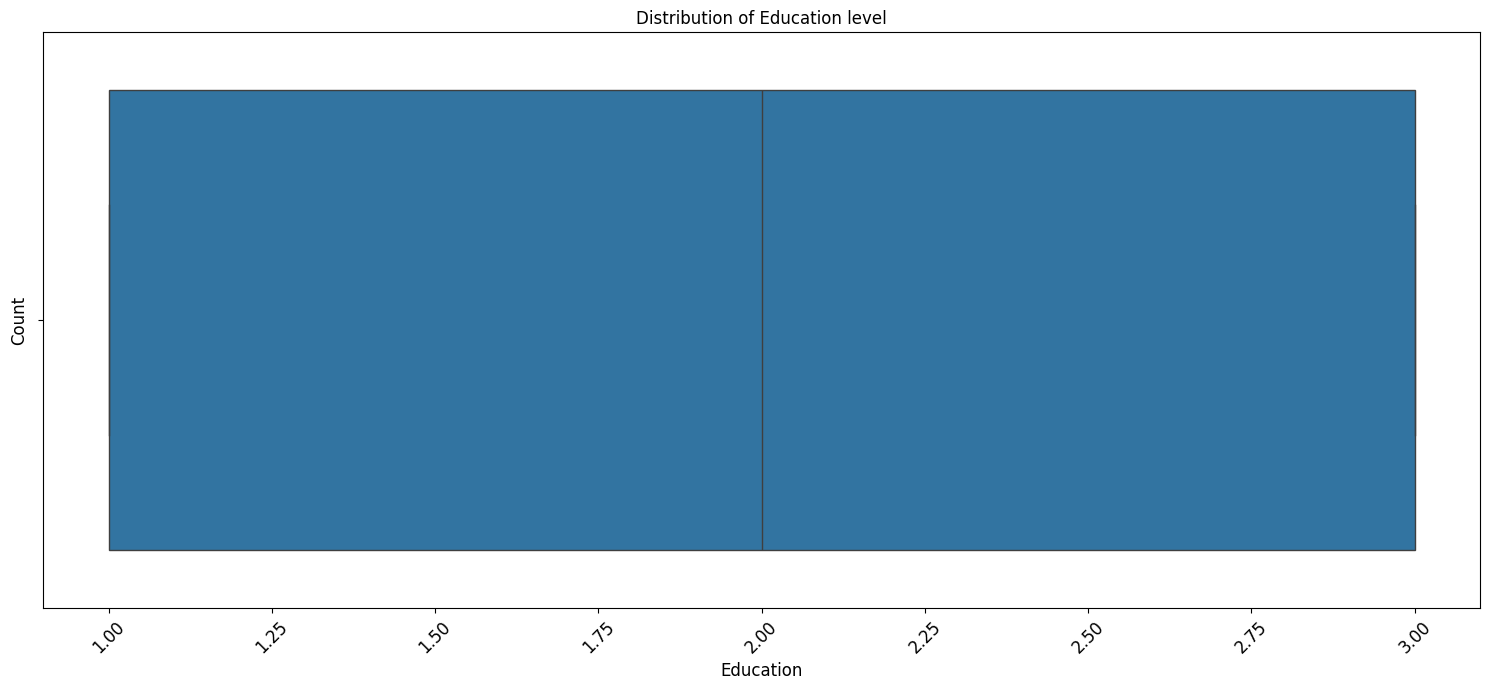

In [41]:
boxplotfunction(loans,"Education",None,"Distribution of Education level","Education","Count",45,12)

#### Distribution of Mortgage: There are many outliers in the Morthgage Distribution. We will work on them (if needed) in the Data Preprocesing section.

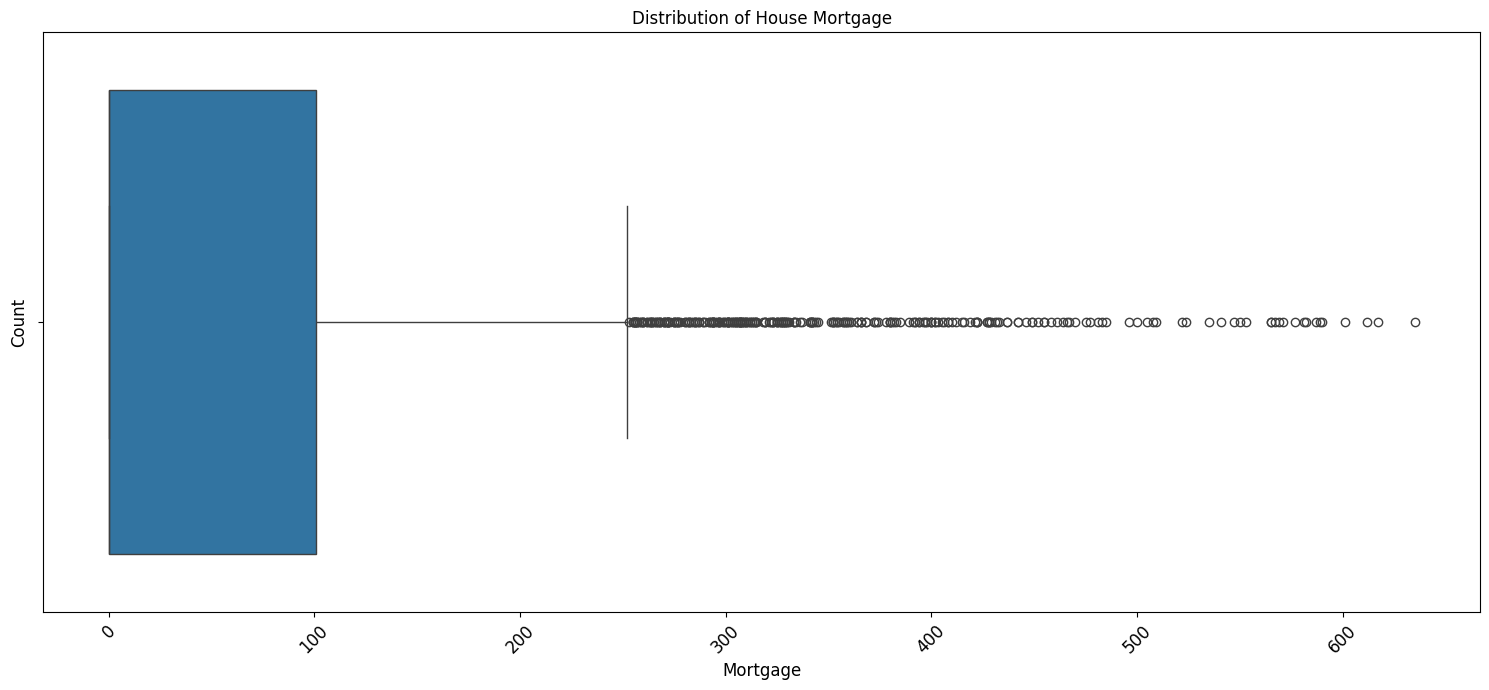

In [42]:
boxplotfunction(loans,"Mortgage",None,"Distribution of House Mortgage","Mortgage","Count",45,12)

* Given the rest of the variables have 0 or 1 as values, there are no outliers for Personal_Loan,Securities_Account,CD_Account,Online and Credit Card.

### Relationship between Income and Personal Loan uptick

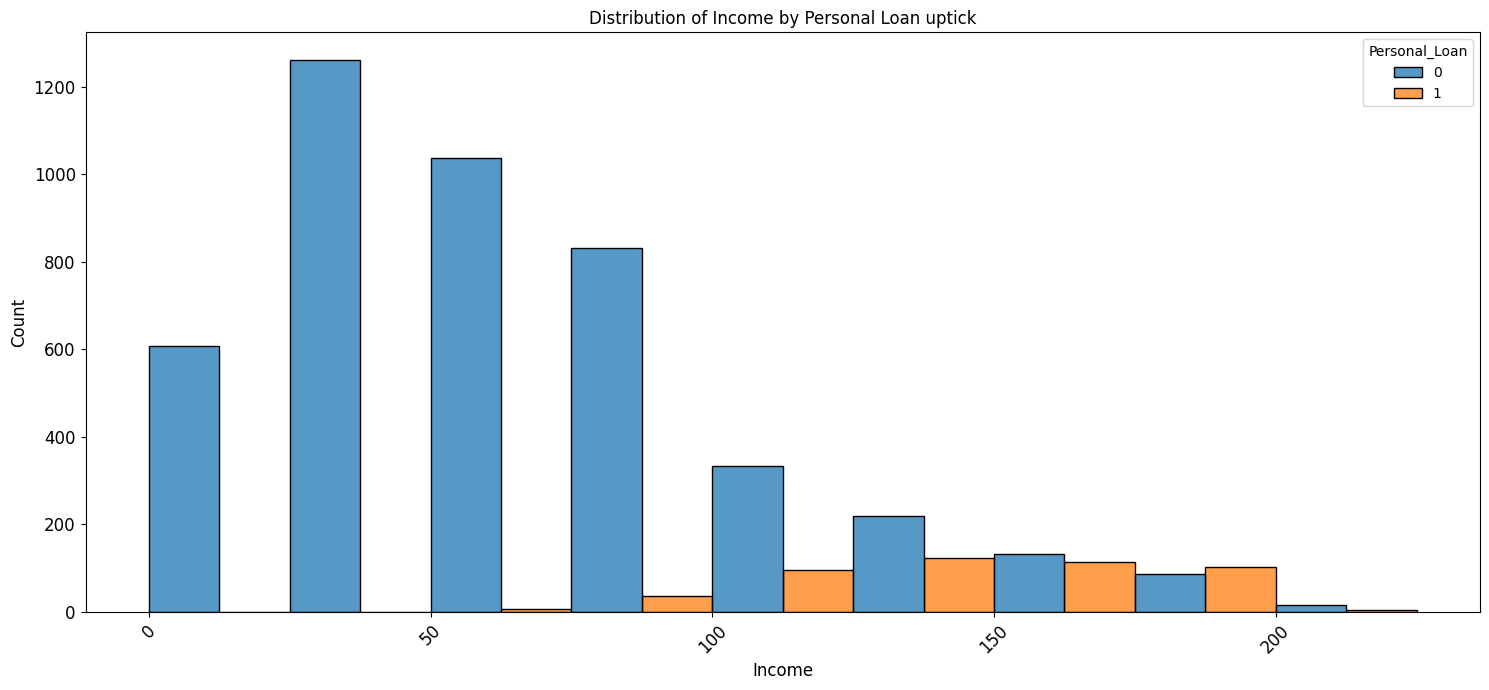

In [43]:
# Histplot for income vs Personal_Loan uptick

histplotfunction(loans,"Income",'Distribution of Income by Personal Loan uptick','Income','Count',45,12,[0,25,50,75,100,125,150,175,200,225],"Personal_Loan")

* We can see in the graphic that as income raises the uptick for getting a long raises too and with an income lower than 50K there is no interest in a personal loan. Ending with a minimal interest in a personal loan when the income is 200K or more. 

### Relationship between Credit Card average spending and personal loan uptick

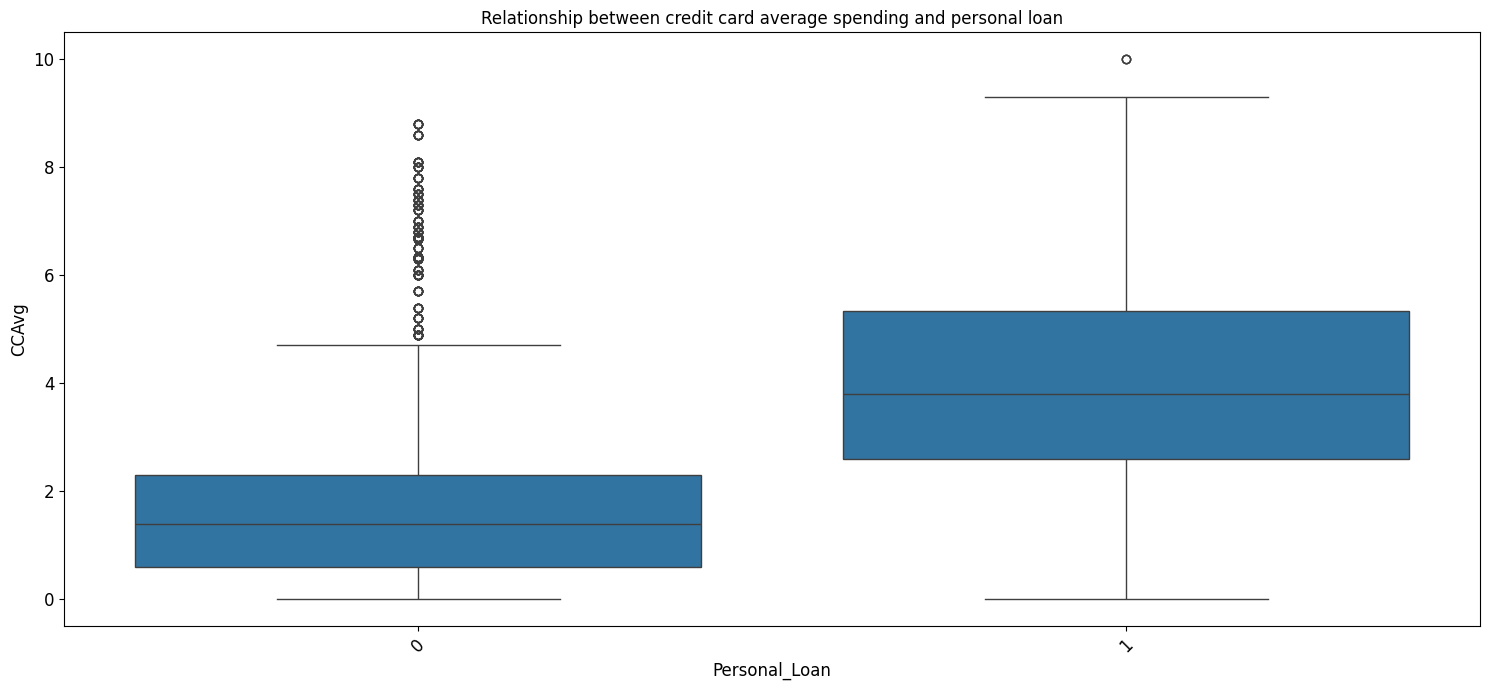

In [44]:
# Histplot for income vs Personal_Loan uptick
boxplotfunction(loans,"Personal_Loan","CCAvg","Relationship between credit card average spending and personal loan","Personal_Loan","CCAvg",45,12)

In [45]:
# Get the outliers for loans uptick equal to 1
print("Outliers for Personal_Loan=1")
loans_1=loans[loans["Personal_Loan"]==1]
showoutliers(loans_1["CCAvg"])

# Get the outliers for no loan uptick (Personal_Loan=0)
print("Outliers for Personal_Loan=0")
loans_0=loans[loans["Personal_Loan"]==0]
showoutliers(loans_0["CCAvg"])


Outliers for Personal_Loan=1
Lower Whisker:  -1.5212499999999998
Upper Whisker:  9.46875
IQR:  2.7475
Q1:  2.6
Q3:  5.3475
Outliers for Personal_Loan=0
Lower Whisker:  -1.9499999999999997
Upper Whisker:  4.85
IQR:  1.6999999999999997
Q1:  0.6
Q3:  2.3


* The average spending in credit card for people interested in a loan is 2747. Anyone with a credit card spending under 2300 are not interested in a loan. We also see many outliers with spending bigger than 4850 that are not interested in a loan. 

### Relationship between Age and Experience

* We know that age and experience have almost a perfect correlation. We will show this now

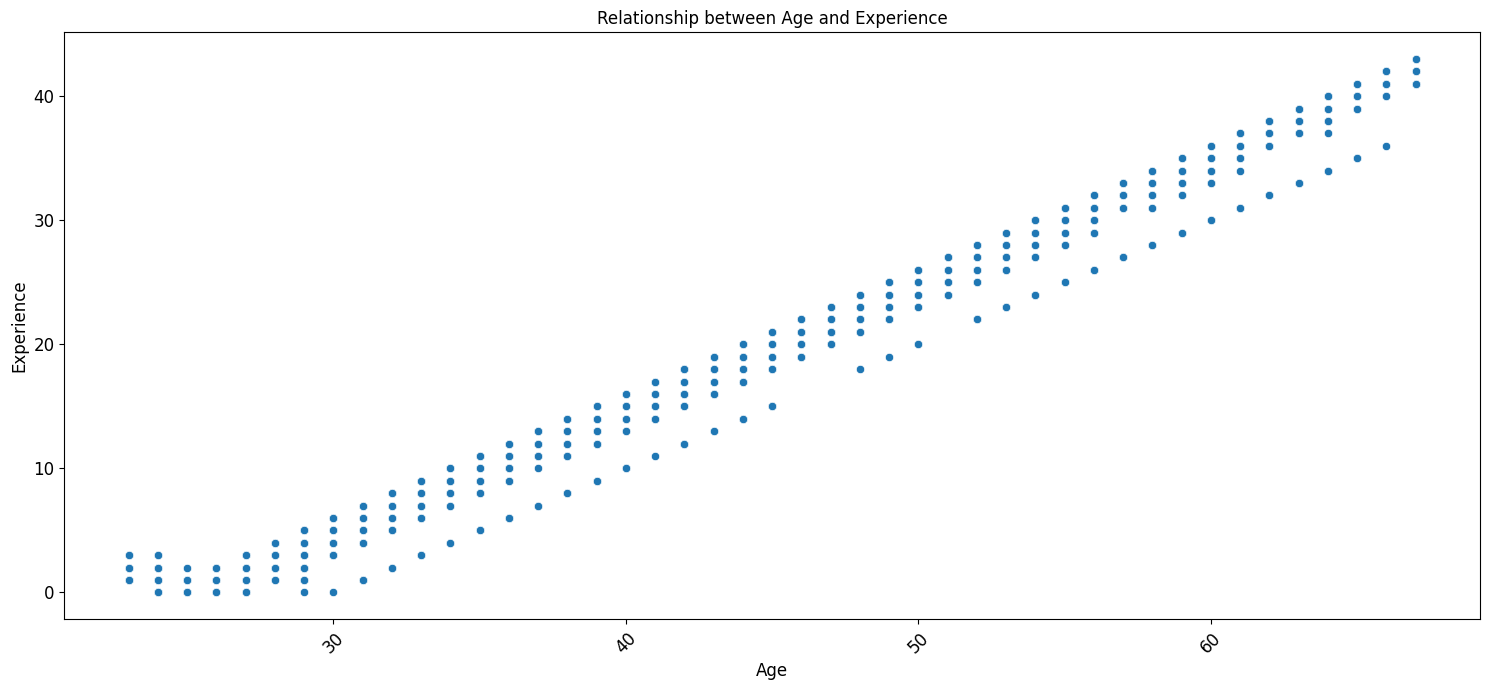

In [46]:
scatterplotfunction(loans,"Age","Experience","Relationship between Age and Experience","Age","Experience",45,12)

* As we can see they are highly correlated and given Age is consider a better option from the bank point of view, we will drop Experience.

### How many customers have deposits and what is the percentage ?

In [47]:
# Check how many customers have deposits with the bank
print("Customers with deposits in the bank: \n",loans.groupby('CD_Account')['CD_Account'].count())

#What percentage of customer have deposits with the bank
df_percentage=loans.groupby(['CD_Account'])[['ID']].count()/loans.shape[0]*100
print("Percentage of customers with deposits with the bank:  \n",df_percentage)



Customers with deposits in the bank: 
 CD_Account
0    4698
1     302
Name: CD_Account, dtype: int64
Percentage of customers with deposits with the bank:  
                ID
CD_Account       
0           93.96
1            6.04


* There are 302 customers that has deposits with the bank which represents only 6.04 percentage of the whole dataset.

### How many customers use the internet banking facilities and what is the percentage ? 

In [48]:
# Check how many customers have deposits with the bank
print("Customers that use the internet banling facilities: \n",loans.groupby('Online')['Online'].count())

#What percentage of customer use the internet banking facilities
df_percentage=loans.groupby(['Online'])[['ID']].count()/loans.shape[0]*100
print("Percentage of customers that use the internet banking facilities: \n",df_percentage)


Customers that use the internet banling facilities: 
 Online
0    2016
1    2984
Name: Online, dtype: int64
Percentage of customers that use the internet banking facilities: 
            ID
Online       
0       40.32
1       59.68


* There are 2984(59.68%) customers that use the internet facilities of the bank and 2016(40.32%) that don't. 

### How many customers have securities with the bank ?

In [49]:
# Check how many customers have secruities with the bank
print("Customers with securities in the bank: \n",loans.groupby('Securities_Account')['Securities_Account'].count())

#What percentage of customer use the internet banking facilities
df_percentage=loans.groupby(['Securities_Account'])[['ID']].count()/loans.shape[0]*100
print("Percentage of customers with securities in the bank: \n",df_percentage)

Customers with securities in the bank: 
 Securities_Account
0    4478
1     522
Name: Securities_Account, dtype: int64
Percentage of customers with securities in the bank: 
                        ID
Securities_Account       
0                   89.56
1                   10.44


* There are only 522 customers that have securities with the bank, which represents 10.44 percentage. 4475 customers don't have securities with the bank which represents 89.56 percentage.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

* There are no missing or duplicate values. This was confirmed in previous steps.
* The following fields have outliers: Income, CCAvg and Mortgage. Let's get the records below and above the whiskers for these fields. 

### Outliers for Income

In [50]:
# Get the Outliers
showoutliers(loans["Income"])

Lower Whisker:  -49.5
Upper Whisker:  186.5
IQR:  59.0
Q1:  39.0
Q3:  98.0


In [51]:
# How may records are below the lower whisker and above the upper whisker

lower_whisker= -49.5
upper_whisker=186.5


records_below=loans[loans["Income"]<=lower_whisker].value_counts()
print("The amount of outliers below the lower_whisker is:", records_below.count())

records_above=loans[loans["Income"]>=upper_whisker].value_counts()
print("The amount of outliers above the upper_whisker is: ",records_above.count())

percentage=records_above.count()/loans.shape[0]*100
print("These records represent ",percentage,"%")

The amount of outliers below the lower_whisker is: 0
The amount of outliers above the upper_whisker is:  96
These records represent  1.92 %


* The outliers represent less than 2 percent of the data. I will get a glance of them to see if there are any weird values that need to be treated.

In [52]:
lower_whisker= -49.5
upper_whisker=186.5

records_below_df=loans[loans["Income"]<=lower_whisker]
records_above_df=loans[loans["Income"]>=upper_whisker]

print(records_above_df.head(15))
print(records_above_df.tail(15))

      ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
18    19   46          21     193    91604       2   8.10          3   
47    48   37          12     194    91380       4   0.20          3   
53    54   50          26     190    90245       3   2.10          3   
59    60   31           5     188    91320       2   4.50          1   
303  304   49          25     195    95605       4   3.00          1   
329  330   28           4     191    90064       1   6.33          1   
459  460   35          10     200    91107       2   3.00          1   
526  527   26           2     205    93106       1   6.33          1   
677  678   46          21     204    92780       2   2.80          1   
740  741   52          27     195    90266       1   8.10          1   
779  780   53          28     192    94304       2   6.40          3   
782  783   54          30     194    92056       3   6.00          3   
787  788   45          15     202    91380       3  10.00       

* After reviewing the head and tail of the dataframe, I don't see any strange values so I won't treat the Income field.

### Outliers for CCAvg

In [53]:
# Get the Outliers
showoutliers(loans["CCAvg"])

Lower Whisker:  -2.0
Upper Whisker:  5.2
IQR:  1.8
Q1:  0.7
Q3:  2.5


In [54]:
# How may records are below the lower whisker and above the upper whisker

lower_whisker= -2
upper_whisker=5.2


records_below=loans[loans["CCAvg"]<=lower_whisker].value_counts()
print("The amount of outliers below the lower_whisker is:", records_below.count())

records_above=loans[loans["CCAvg"]>=upper_whisker].value_counts()
print("The amount of outliers above the upper_whisker is: ",records_above.count())

percentage=records_above.count()/loans.shape[0]*100
print("These records represent ",percentage,"%")


The amount of outliers below the lower_whisker is: 0
The amount of outliers above the upper_whisker is:  340
These records represent  6.800000000000001 %


* The outliers represent less than 6.8% of the data.  I will get a glance of them to see if there are any weird values that need to be treated.

In [55]:

lower_whisker= -2
upper_whisker=5.2

records_below_df=loans[loans["CCAvg"]<=lower_whisker]
records_above_df=loans[loans["CCAvg"]>=upper_whisker]

print(records_above_df.head(15))
print(records_above_df.tail(15))


      ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
9     10   34           9     180    93023       1    8.9          3   
18    19   46          21     193    91604       2    8.1          3   
44    45   46          20     104    94065       1    5.7          1   
55    56   41          17     139    94022       2    8.0          1   
61    62   47          21     125    93407       1    5.7          1   
90    91   55          30     118    90277       4    5.6          2   
96    97   41          15      80    95014       1    5.2          1   
131  132   58          34     149    93720       4    7.2          2   
145  146   59          35     124    90007       1    7.4          1   
150  151   46          22     118    94107       2    7.5          1   
151  152   26           0     132    92834       3    6.5          3   
160  161   29           0     134    95819       4    6.5          3   
172  173   38          13     171    92717       2    7.8       

* After reviewing the head and tail of the dataframe, I don't see any strange values so I won't treat the CCAvg field.

### Outliers for Mortgage

In [56]:
# Get the Outliers
showoutliers(loans["Mortgage"])

Lower Whisker:  -151.5
Upper Whisker:  252.5
IQR:  101.0
Q1:  0.0
Q3:  101.0


In [57]:
# How may records are below the lower whisker and above the upper whisker

lower_whisker=-151.5
upper_whisker=252.5

records_below=loans[loans["Mortgage"]<=lower_whisker].value_counts()
print("The amount of outliers below the lower_whisker is:", records_below.count())

records_above=loans[loans["Mortgage"]>=upper_whisker].value_counts()
print("The amount of outliers above the upper_whisker is: ",records_above.count())

percentage=records_above.count()/loans.shape[0]*100
print("These records represent ",percentage,"%")



The amount of outliers below the lower_whisker is: 0
The amount of outliers above the upper_whisker is:  291
These records represent  5.82 %


* The outliers represent only 5.82%. I will get a glance of the outliers next to see if there are any weird values that need to be treated.

In [58]:
lower_whisker=-151.5
upper_whisker=252.5

records_above_df=loans[loans["Mortgage"]>=upper_whisker]

print(records_above_df.head(15))

      ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
22    23   29           5      62    90277       1    1.2          1   
39    40   38          13      80    94115       4    0.7          3   
42    43   32           7     132    90019       4    1.1          2   
59    60   31           5     188    91320       2    4.5          1   
66    67   62          36     105    95670       2    2.8          1   
112  113   40          15      82    91775       3    1.0          1   
119  120   32           7     112    94304       1    4.6          1   
130  131   28           4      81    94801       3    1.5          1   
187  188   46          21     159    94305       3    1.9          3   
209  210   64          39     172    94707       4    3.1          1   
242  243   41          16      75    94005       1    3.7          3   
248  249   55          29      99    92121       2    1.4          1   
251  252   54          28     170    92182       2    6.2       

In [59]:
print(records_above_df.tail(15))

        ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4674  4675   40          14      93    93933       1    2.8          3   
4678  4679   33           7     115    93305       1    2.7          2   
4698  4699   48          22     162    94143       3    1.4          1   
4714  4715   27           3      81    90291       3    1.5          1   
4735  4736   34           9      84    94707       4    2.2          2   
4765  4766   58          34      82    94025       1    4.3          1   
4812  4813   29           4     184    92126       4    2.2          3   
4842  4843   49          23     174    95449       3    4.6          2   
4844  4845   31           6      81    90840       2    2.5          1   
4847  4848   37          11      65    94143       2    2.4          2   
4859  4860   34           8     165    91107       1    7.0          3   
4865  4866   50          24     133    90025       4    1.4          2   
4899  4900   54          29      85   

* After reviewing the head and tail of the dataframe, I don't see any strange values so I won't treat the Mortgage field.

## Feature Engineering

### ZIPCode Analysis

* Given the first two digits of the ZIPCode will allow us to identify the geographic region, typically covering a group of states, we will just get those digits and see how many unique values we have. 

In [60]:
loans["ZIPCode"] = loans["ZIPCode"].astype(str)
print(
    "Number of unique values if we take the first two digits of ZIPCode: ",
    loans["ZIPCode"].str[0:2].nunique())

loans["ZIPCode"] = loans["ZIPCode"].str[0:2]

Number of unique values if we take the first two digits of ZIPCode:  7


In [61]:
# Example of how the ZIPCode column looks like now
loans["ZIPCode"].head()

0    91
1    90
2    94
3    94
4    91
Name: ZIPCode, dtype: object

## Data Preparation for modeling

## Check the dataset again

In [62]:
# Check the datatypes

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   object 
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [63]:
# Convert the ZIPCode back to int64
loans["ZIPCode"] = loans["ZIPCode"].astype('int64')

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Drop values for the model building
* We are dropping personal_loan column given it's the one that we want to predict.
* We are dropping ID column given it does not add any insights for the analysis because it's just an autonumeric value.
* We are dropping Experience given it's almost perfectly correlated with Age and Age is a more valuable attribute for the bank.


In [64]:
# dropping Experience as it almost perfectly correlated with Age.
# dropping Personal_Loan given it's the variable that we want to predict.
# dropping ID given it's a unique identifier that is not useful for the model.

X = loans.drop(["Personal_Loan","Experience","ID"], axis=1)
Y = loans["Personal_Loan"]

## Get the dummies for the following fields: ZIPCode and Education

* Analyzing all the fields, we can get dummies for ZIPCode and Education.

In [65]:
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Model Building

## Model Evaluation Criterion

* The model has a field that needs to be predicted with a yes, no answer. Given that, clustering is not the right choice. We are left with regression or decision trees. Although regression can show relationships between variables, it's not suitable for predicting a binary outcome like Personal_Loan. Therefore I will implement a decision tree model.

## Add Functions and libraries needed for a decision tree

In [66]:
# to split data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

In [67]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [68]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

In [69]:
# function to visualize the tree

def visualize_tree(features,tree_param,title):

    feature_names = list(features)

    # set the figure size for the plot
    plt.figure(figsize=(20, 20))

    # plotting the decision tree
    out = tree.plot_tree(
        tree_param,                         # decision tree classifier model
        feature_names=feature_names,    # list of feature names (columns) in the dataset
        filled=True,                    # fill the nodes with colors based on class
        fontsize=9,                     # font size for the node text
        node_ids=False,                 # do not show the ID of each node
        class_names=None,               # whether or not to display class names
    )

    # add arrows to the decision tree splits if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")    # set arrow color to black
            arrow.set_linewidth(1)          # set arrow linewidth to 1

    # displaying the plot
    plt.title(title)
    plt.show()

In [70]:
# printing a text report showing the rules of a decision tree
def print_text_report(tree_param,features):
    feature_names = list(features)
    print(
    tree.export_text(
        tree_param,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
    )

In [71]:
# Feature importance function
def feature_importance(tree_param,features):
    
    feature_names=list(features)
  
    importances = tree_param.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(8, 8))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="green", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

## Splitting of the dataset

In [72]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   float64
 1   Income              5000 non-null   float64
 2   Family              5000 non-null   float64
 3   CCAvg               5000 non-null   float64
 4   Mortgage            5000 non-null   float64
 5   Securities_Account  5000 non-null   float64
 6   CD_Account          5000 non-null   float64
 7   Online              5000 non-null   float64
 8   CreditCard          5000 non-null   float64
 9   ZIPCode_91          5000 non-null   float64
 10  ZIPCode_92          5000 non-null   float64
 11  ZIPCode_93          5000 non-null   float64
 12  ZIPCode_94          5000 non-null   float64
 13  ZIPCode_95          5000 non-null   float64
 14  ZIPCode_96          5000 non-null   float64
 15  Education_2         5000 non-null   float64
 16  Educat

In [74]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (3500, 17)
Shape of test set: (1500, 17) 

Percentage of classes in training set:
0    90.542857
1     9.457143
Name: Personal_Loan, dtype: float64 

Percentage of classes in test set:
0    90.066667
1     9.933333
Name: Personal_Loan, dtype: float64


## Full Decision Tree

In [75]:
# creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(random_state=1)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Plot the confusion matrix

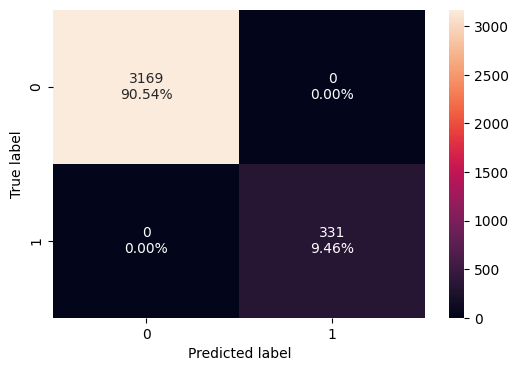

In [76]:
plot_confusion_matrix(dtree1, X_train, y_train)

### Get the metrics for Accuracy, Recall,Precision and F1 for training dataset

In [77]:
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Plot the confusion matrix for test dataset

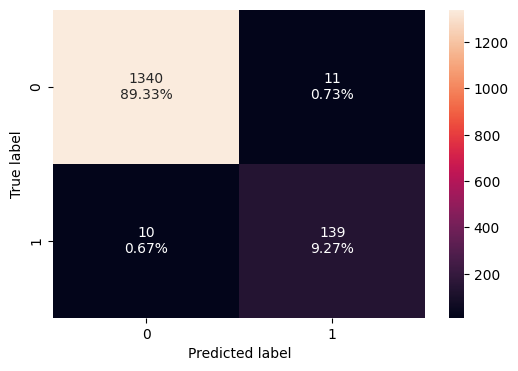

In [78]:
plot_confusion_matrix(dtree1, X_test, y_test)

### Get the metrics for Accuracy, Recall,Precision and F1 for test dataset

In [79]:
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


### Visualization of the tree

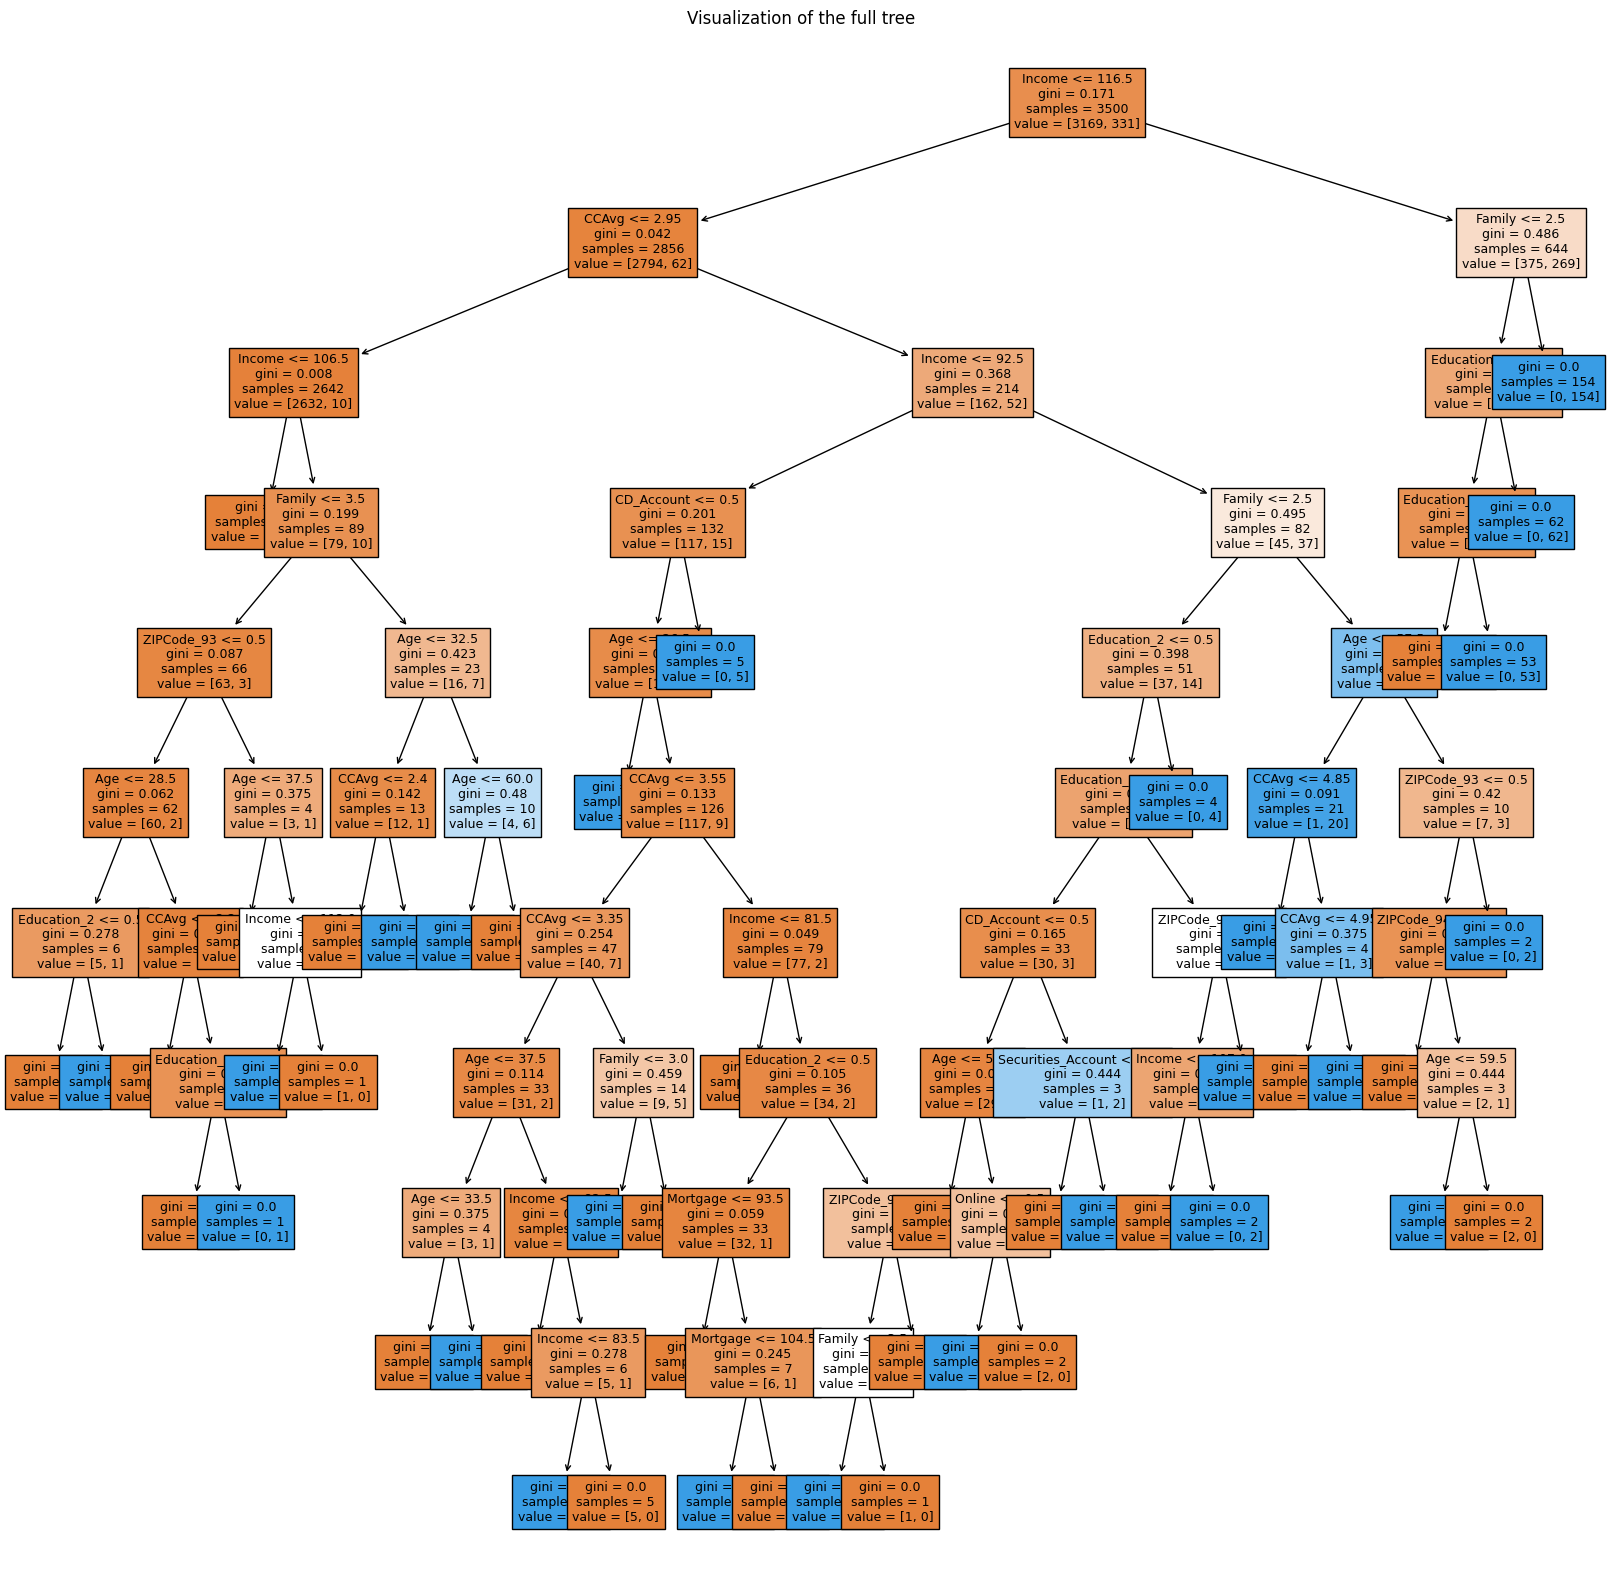

In [80]:
visualize_tree(X_train.columns,dtree1,"Visualization of the full tree")

### Print a text report to see the rules of the full tree

In [81]:
print_text_report(dtree1,X_train.columns)

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

### Feature importance for the full tree

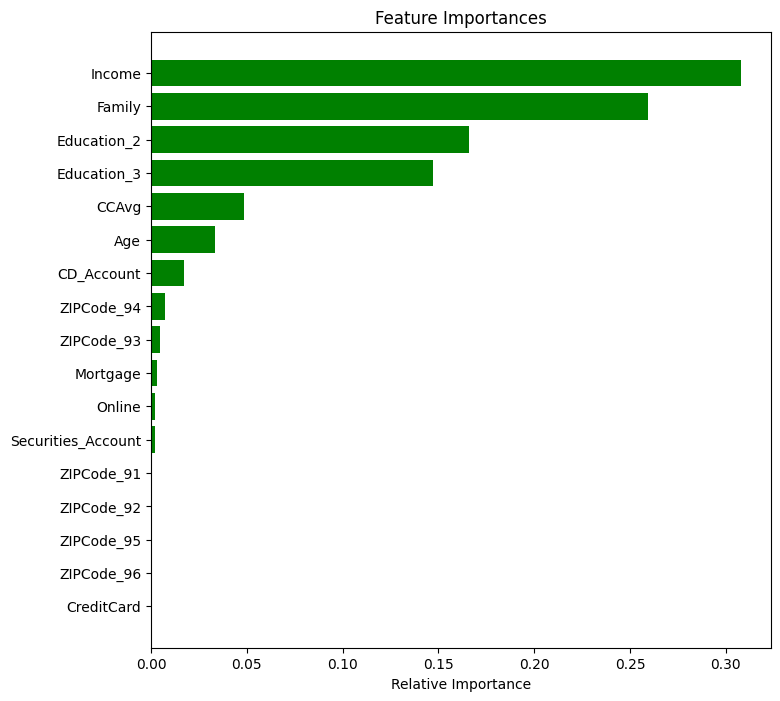

In [82]:
feature_importance(dtree1,X_train.columns)

## Model Performance Improvement

### Decision Tree (Pre-pruning)

#### Get the optimal max_depth, max_leaf_nodes and min_sample and generate a new tree.

In [83]:
# define the parameters of the tree to iterate over
# Using the same parameters than the case study about Loan Delinquent Analysis
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=1
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator
# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")


Best parameters found:
Max depth: 2
Max leaf nodes: 10
Min samples split: 10


#### Generate the tree with the best values obtained in the code above

In [84]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=10,
                       min_samples_split=10, random_state=1)

#### Check the training and testing performance of the pre-pruned tree

##### Training data

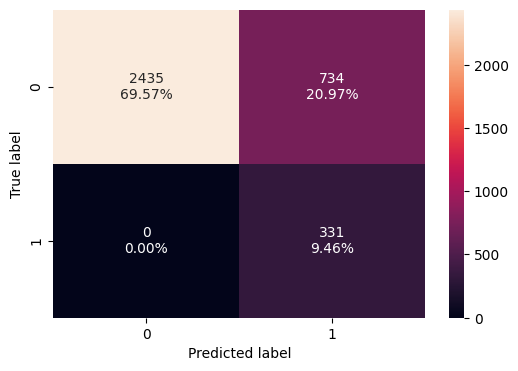

In [85]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [86]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


##### Testing data

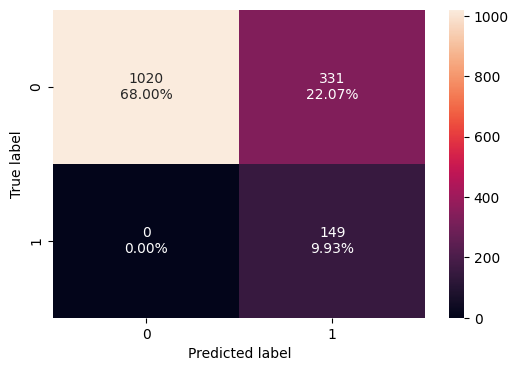

In [87]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [88]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


- The training and test scores are very close to each other, indicating a generalized performance.

#### Visualization of the pre-pruned tree

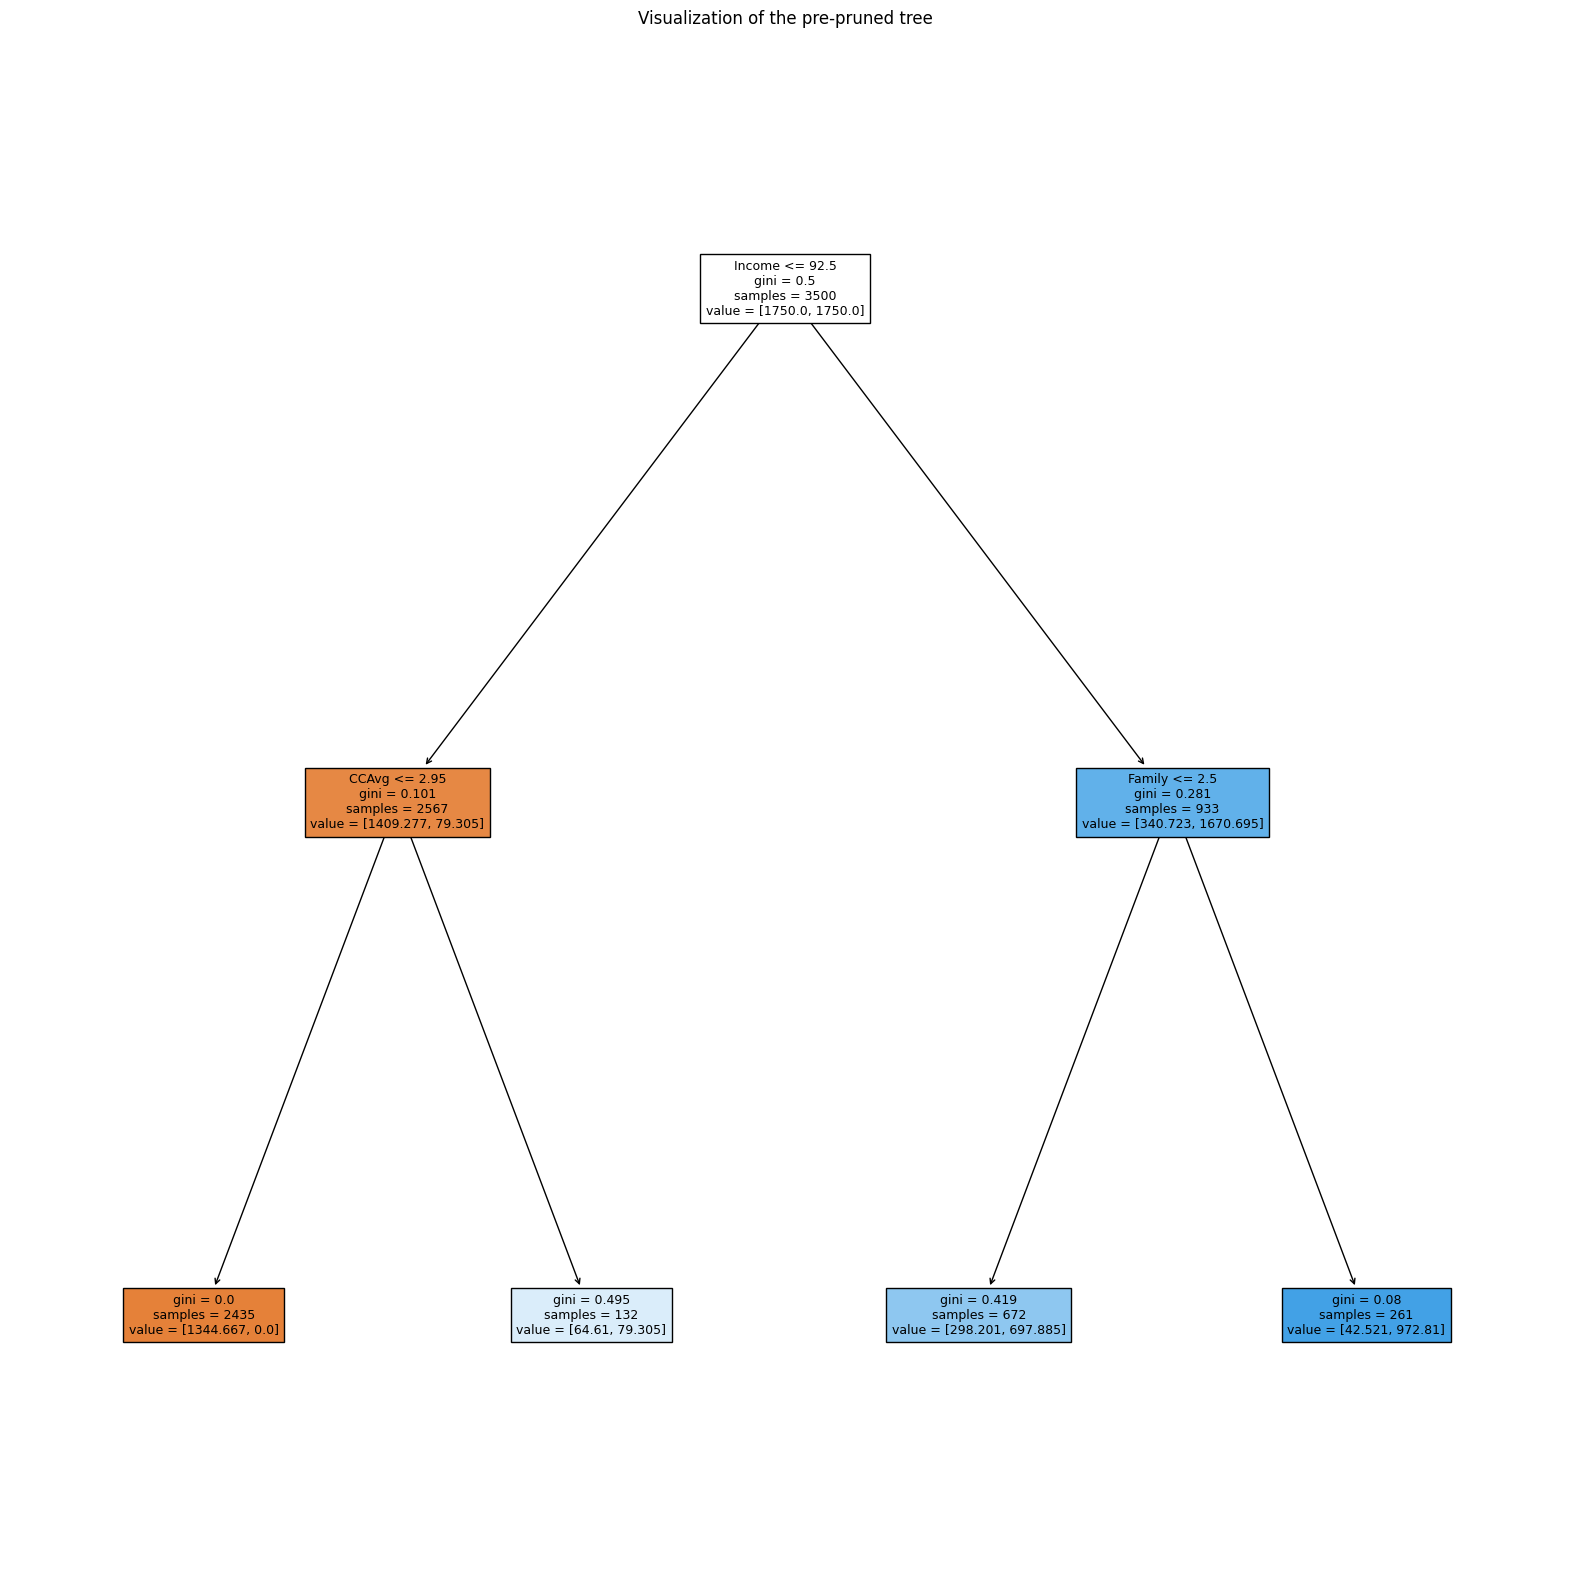

In [89]:
visualize_tree(X_train.columns,dtree2,"Visualization of the pre-pruned tree")

* As we can see this tree is less complex that the full tree

#### Print a text report to the see the rules of the pre-pruned tree

In [90]:
print_text_report(dtree2,X_train.columns)

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



#### Feature importance for the pre-pruned tree

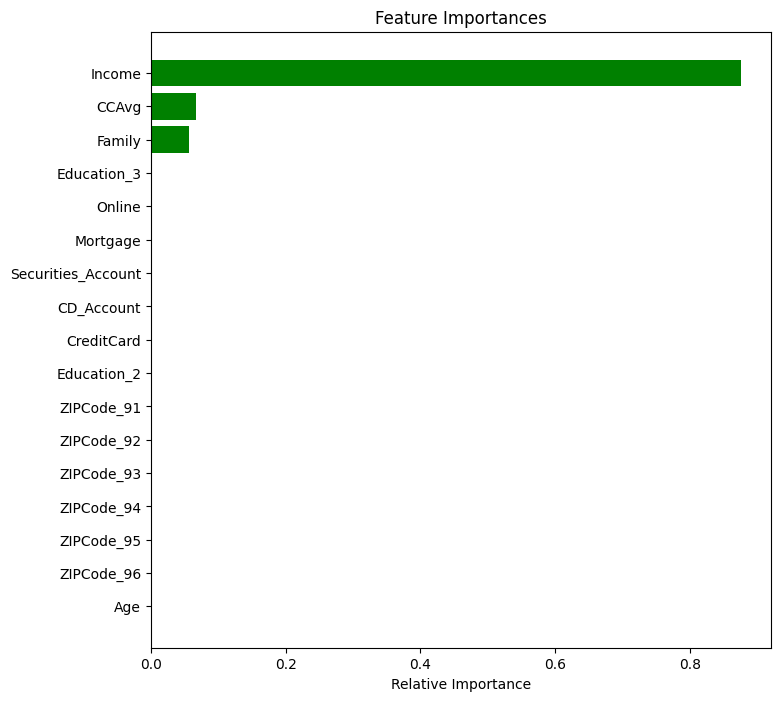

In [91]:
feature_importance(dtree2,X_train.columns)

### Decision Tree (Post-pruning)

#### Create an instance of the decision tree model

In [92]:
clf = DecisionTreeClassifier(random_state=1)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = path.ccp_alphas

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities


#### Get the ccp_alphas

In [93]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


- Next, we train a decision tree using the effective alphas.

- The last value in `ccp_alphas` is the alpha value that prunes the whole tree, leaving the corresponding tree with one node.

#### Create a decision tree for each ccp_alpha and store it in clf

In [94]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    # Fit the classifier to the training data
    clf.fit(X_train, y_train)
    # Append the trained classifier to the list
    clfs.append(clf)
# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04708834100596766


#### Create the total impurity vs effective alpha for the training set of the tree

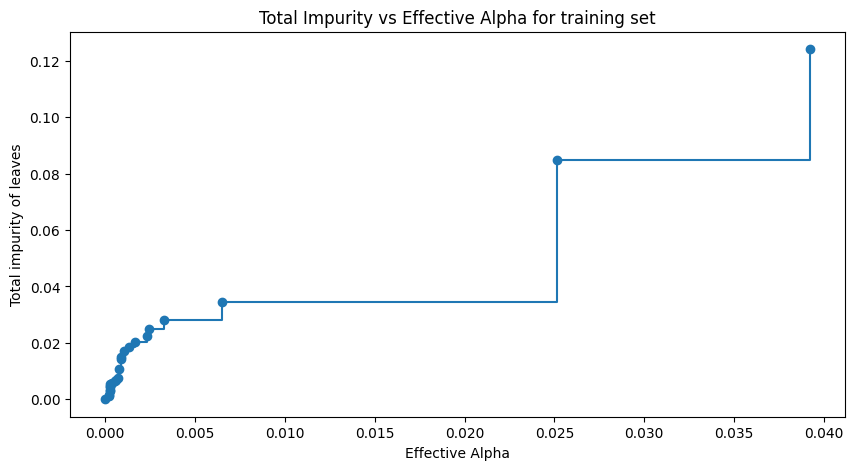

In [95]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

#### Create the Number of nodes vs alpha and the depth vs alpha plots

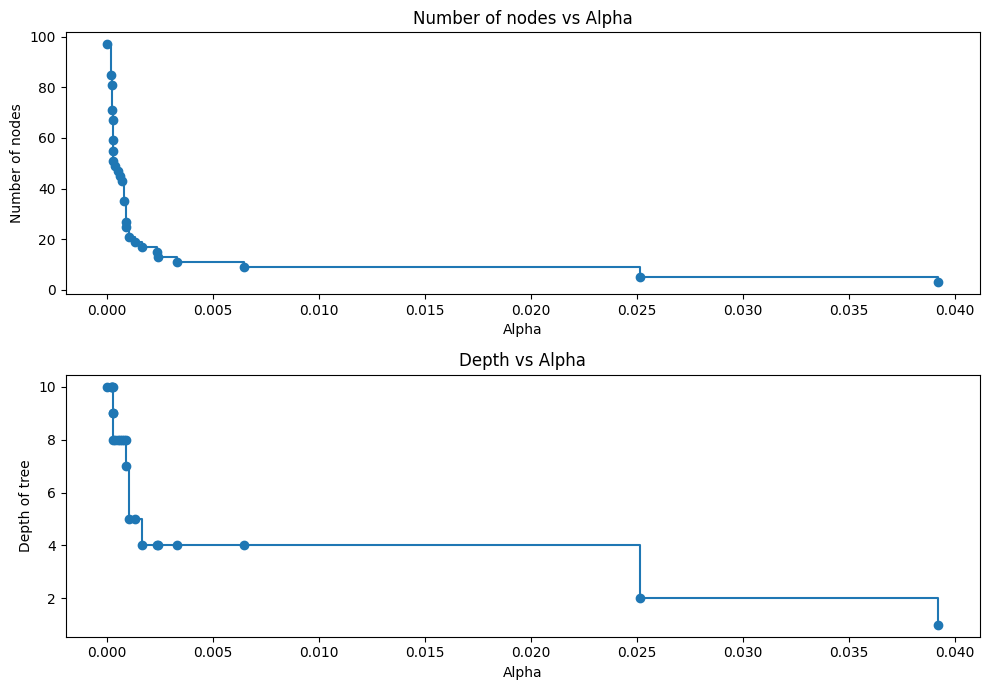

In [96]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

#### Get F1 scores for training set for each decision tree classifier

In [97]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

#### Get F1 scores for testing set for each decision tree classifier

In [98]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

#### Plot F1 scores for training and test

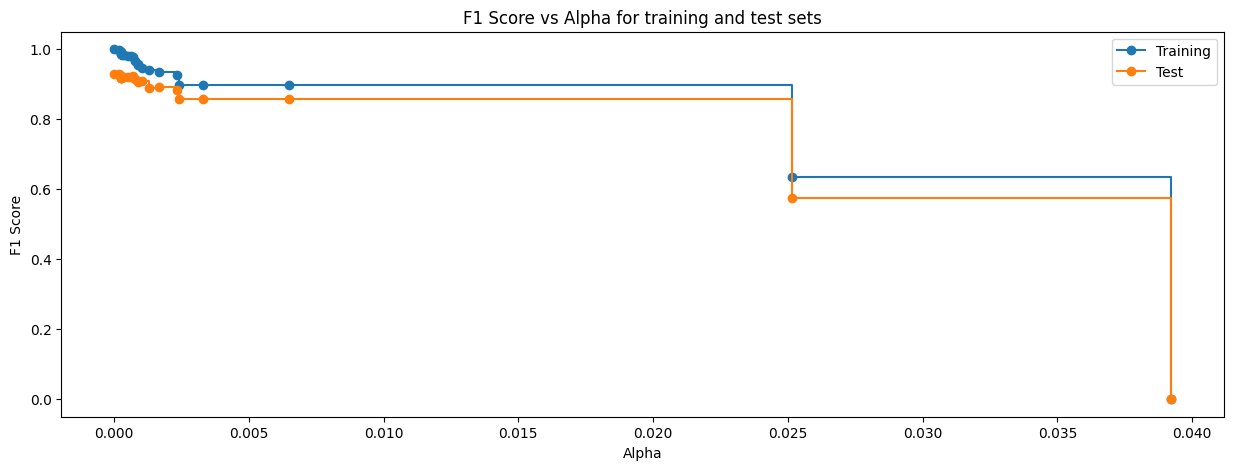

In [99]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="Training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="Test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot


#### Get the best model for post-pruning

In [100]:
index_best_model = np.argmax(test_f1_scores)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


#### Visualize this tree

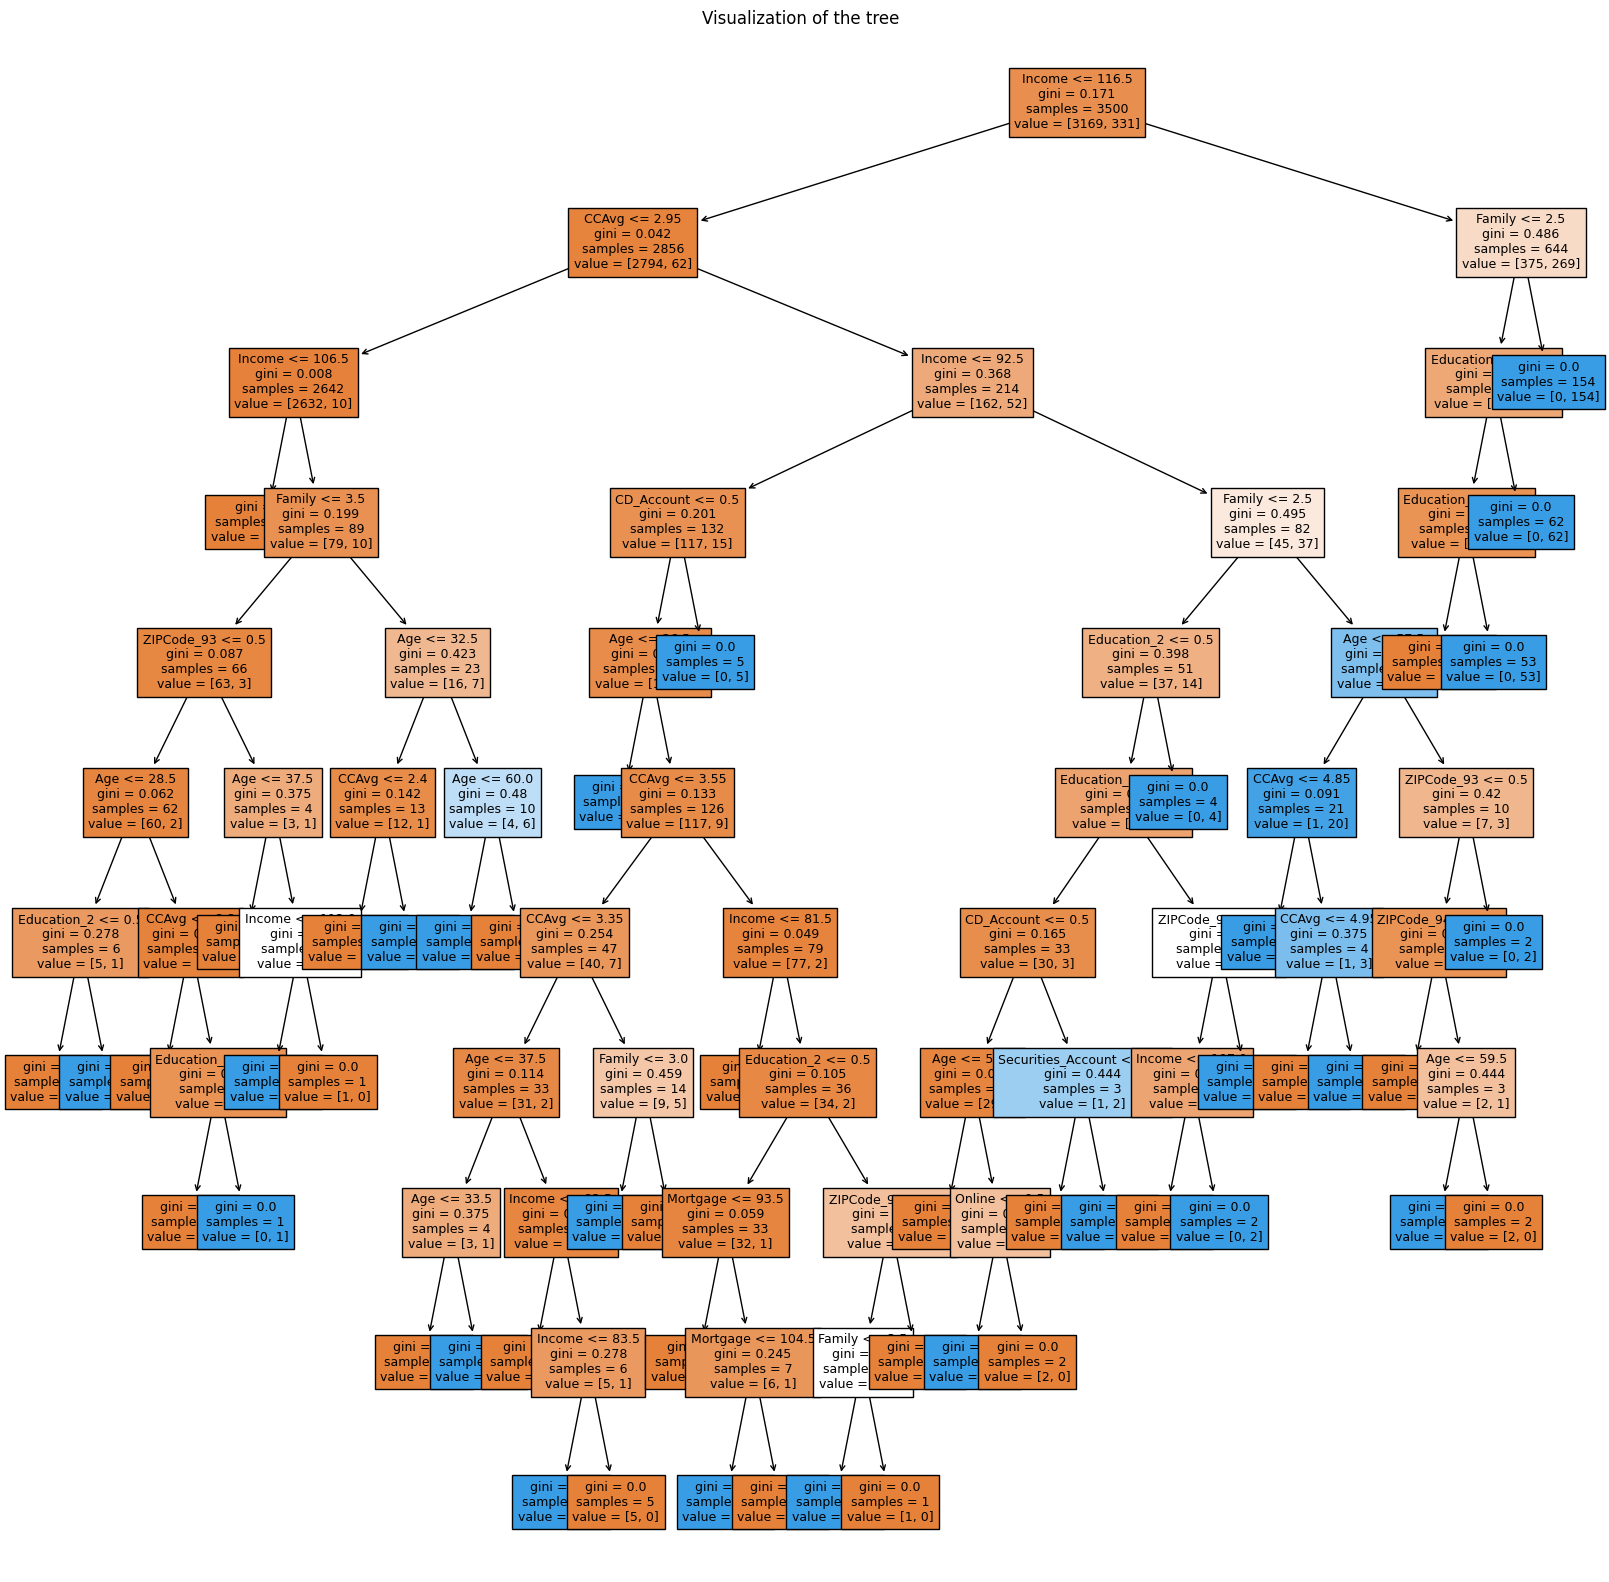

In [101]:
best_model=DecisionTreeClassifier(random_state=1)
best_model.fit(X_train,y_train)
visualize_tree(X_train.columns,best_model,"Visualization of the tree")

* Given the alpha for this model is 0 and still gives a very complex tree, I have choose to use the third value from the last alpha from the pruning path given this value is between 0.05 and 0.010 which assures me still a good F1 score.

In [102]:
ccp_alphas[-3]

0.006472814718223811

In [103]:
dtree3=DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alphas[-3],class_weight='balanced')
dtree3.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.006472814718223811, class_weight='balanced',
                       random_state=1)

#### Check the training and testing performance of the post-pruned tree

##### Training data

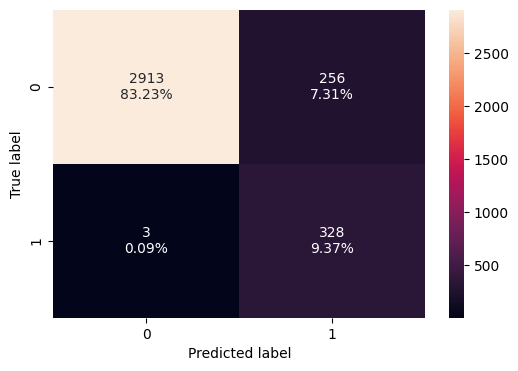

In [104]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [105]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,0.926,0.990937,0.561644,0.71694


##### Testing data

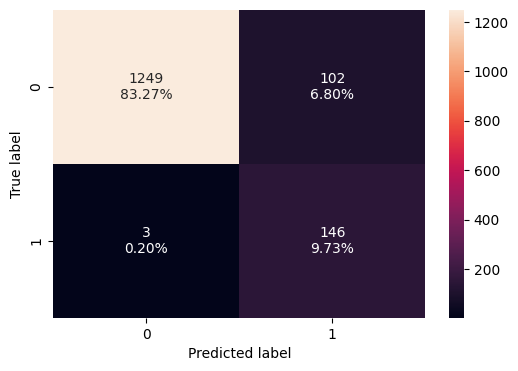

In [106]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [107]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.93,0.979866,0.58871,0.735516


- The training and test scores are very close to each other, indicating a generalized performance.

#### Visualization of the post-pruned tree

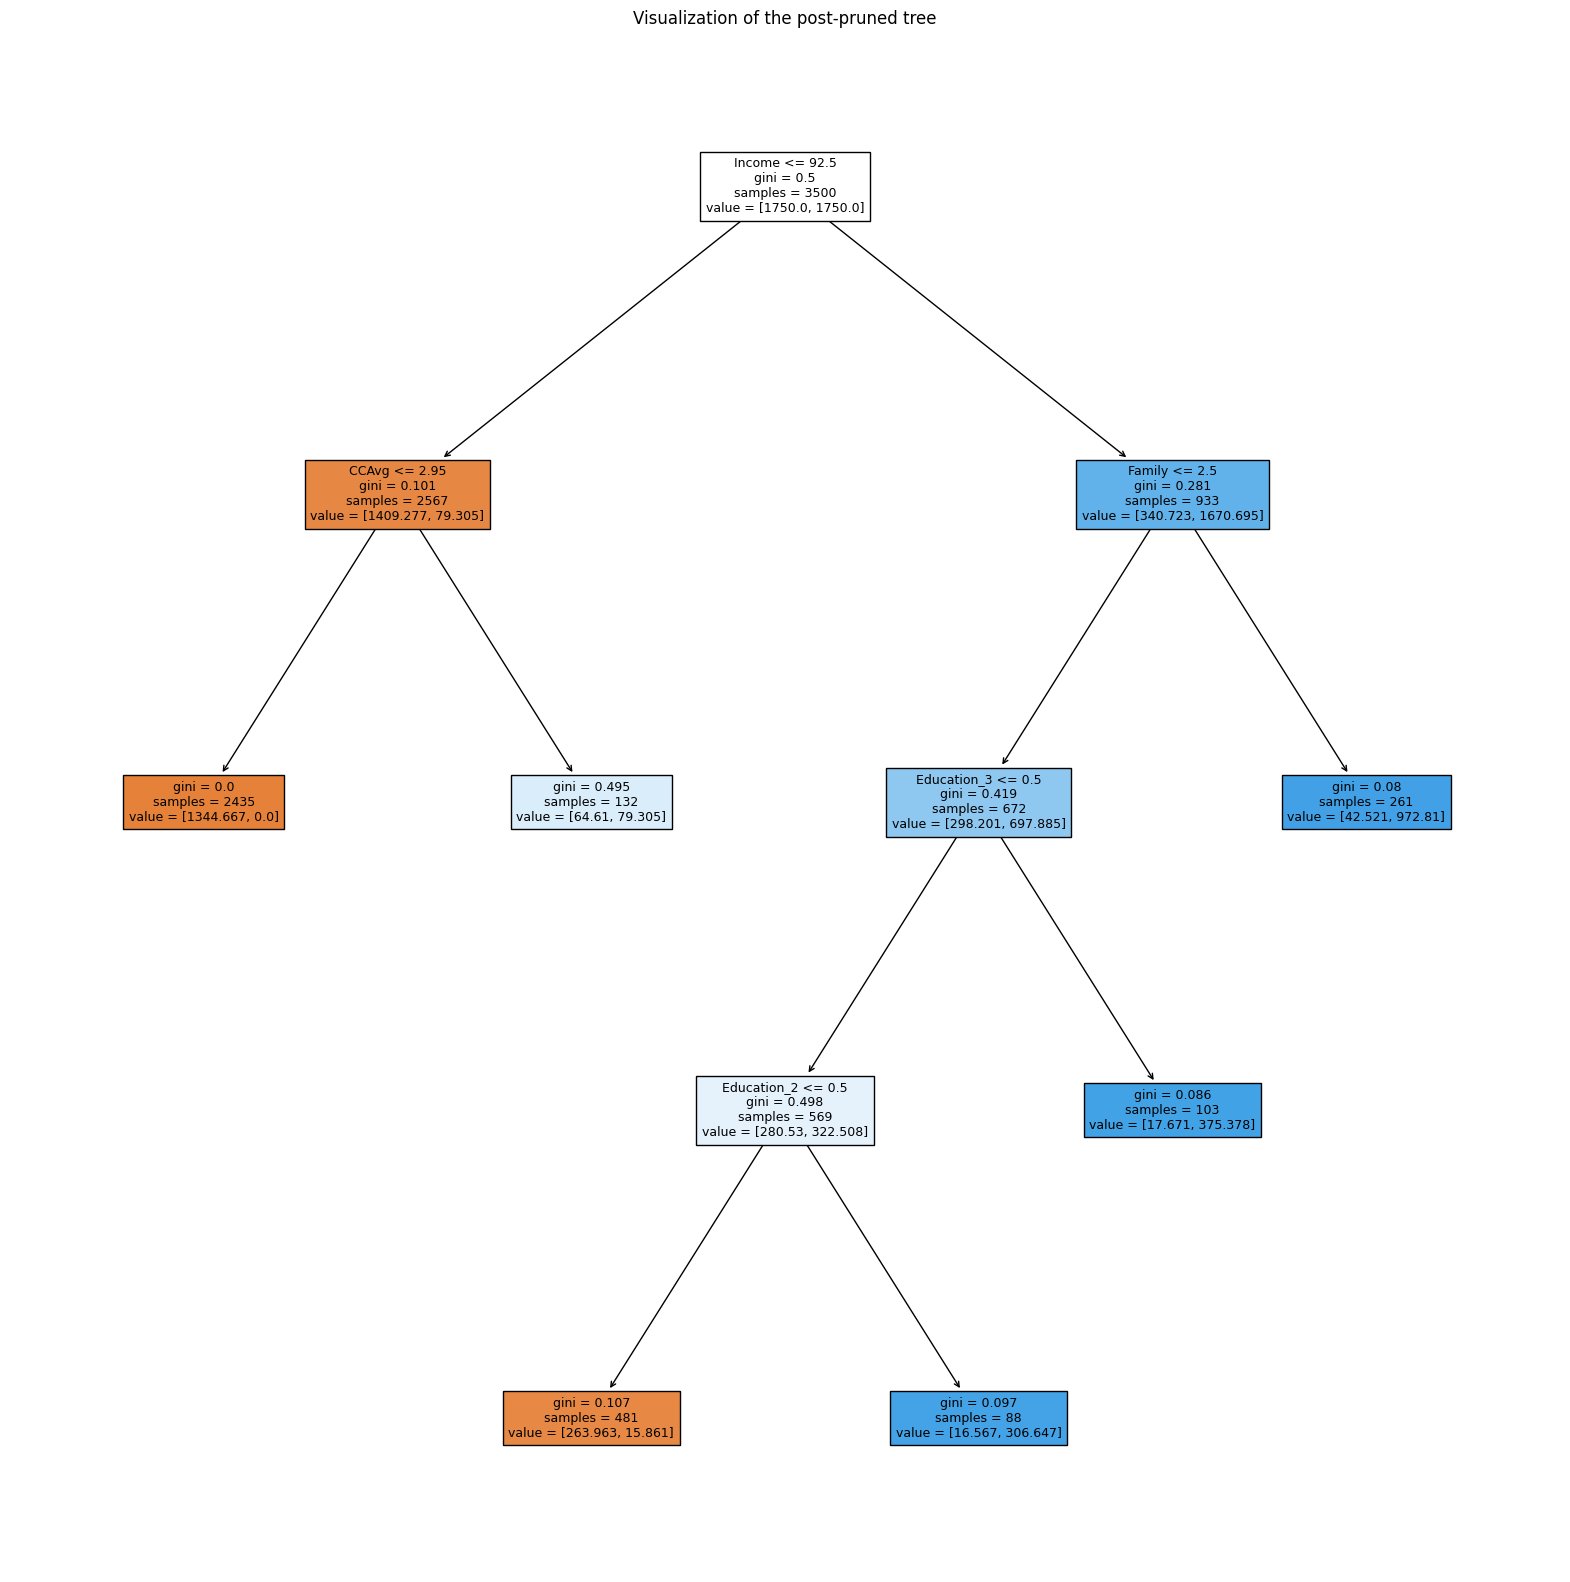

In [108]:
visualize_tree(X_train.columns,dtree3,"Visualization of the post-pruned tree")

* This tree is far less complex.

#### Print a text report to the see the rules of the pre-pruned tree

In [109]:
print_text_report(dtree3,X_train.columns)

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [263.96, 15.86] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [16.57, 306.65] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [17.67, 375.38] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



#### Feature importance for the post-pruned tree

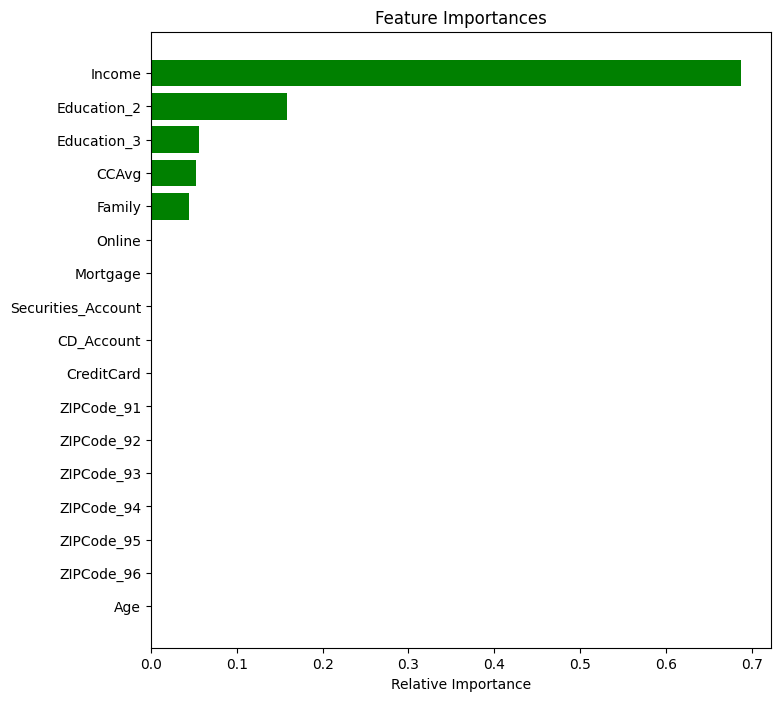

In [110]:
feature_importance(dtree3,X_train.columns)

## Model Performance Comparison and Final Model Selection

### Training performance comparison

In [111]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.790286,0.926000
Recall,1.0,1.000000,0.990937
Precision,1.0,0.310798,0.561644
F1,1.0,0.474212,0.716940


### Testing performance comparison

In [112]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.779333,0.930000
Recall,0.932886,1.000000,0.979866
Precision,0.926667,0.310417,0.588710
F1,0.929766,0.473768,0.735516


# Actionable Insights and Business Recommendations

### Insights

* Almost 70% of the customers don't have a mortgage.
* 1470 customers have credit cards with other banks.
* Income and Average spending on credit cards per month (in thousand dollars) has the stronger correlations with the Personal_Loan
* Also, there is a very high correlation between Age and Experience which makes sense given as people age, they get more experience.
* There is also a strong correlation between Income and Average spending on credit cards per month (in thousand dollars).
* The interest in a loan in the dataset is very low not matter the age, being the lowest before 30 years old and after 60 years old.
* We got negative values in experience that were converted to absolute values. 
* For an education level 2 and 3 which are Graduated and Advanced/Professional, the interest in purchasing a loan goes up drastically. There is virtually no interest in purchasing a loan for people that have a level 1 education, which means they are Undergrad. 
* As income increases the uptick for getting a loan rises too and with an income lower than 50K there is no interest in a personal loan. Also, for income of 200k or more there is minimal interest in a personal loan. 
* The average spending on credit card for people interested in a loan is 2747. Anyone with a credit card spending under 2300 is not interested in a loan. We also see many outliers spending bigger than 4850 that are not interested in a loan. 
* There are 302 customers that have deposits with the bank which represents only 6.04 percent of the whole dataset.
* There are 2984(59.68%) customers that use the internet facilities of the bank and 2016(40.32%) that don't. 
* There are only 522 customers that have securities with the bank, which represents 10.44 percent. 4475 customers don't have securities with the bank which represents 89.56 percent.
* There are no missing or duplicate values. 
* The following fields have outliers: Income, CCAvg and Mortgage. Upon verification, these outliers are considered real values that don't need to be treated.
* Given that the first two digits of the ZIPCode will allow us to identify the geographic region, typically covering a group of states, we will just get those digits and see how many unique values we have to avoid a heavy processing for a field that has a very low correlation with Personal_Loan (-0.003) . 

## Business Recommendations

All trees are closer between training and test dataset metrics which implies that they are good models with train and test data. 
The post-pruned tree exhibits better metrics in the test dataset than the pre-pruned tree (with the exception of recall). I recommend using this tree for prediction overall.

* Data:
    * Create surveys for the following: 
    * Why didn’t the customers accept the loan the first time? This will allow deeper analysis on the success on the uptick for a Personal Loan. Example: Was the loan amount too low, too high? What about the APR? Was competitive with other banks? etc. 
    * Given that many customers have credit cards with other banks, review if there is a reason why they don't take the credit card offered by the bank. 
    * Given only 10.44% of customers have securities with the bank, and only 6.08 % have deposits with the bank, evaluate the satisfaction on these two products to see what options or promotions could increase these numbers.
* Feature importance:
    * Based on the graphics already provided above the main features to consider a new marketing campaign are Income and Education, follow by Credit Card monthly average spending and family size. 
* Customer segmentation:
    * The relationship between ZIPCode and Personal Loan is very low as explained above, therefore more data will need to be gathered to see if the location of the customer can be considered to offer personal loans. At this time, with the data provided there is barely a relationship between Zip Code and Personal Loan uptick. 
* Use of the model:
    * Use this model to post-pruned model to predict if a certain individual would likely take a personal_loan and use this information to increase the number of clients with personal loans.

___

In [113]:
# Create the HTML for the notebook
!jupyter nbconvert --to html "C:\Marina\.AIatUT\2.Machine Learning\Project2-LoanCampaign\AIML_ML_Project_full_code_notebook.ipynb" --log-level=ERROR